# NYC Mobility Insights: Which Factors Influence Customer Choice?

Group 3: Ahmed Farid Khan, Srithijaa Sankepally, Pei-Hsin Yang, Chih-Hsin Peng, Shayan Hasan

# Introduction + Motivation

This project presents a comprehensive analysis of New York City's transportation trends between 2016 and 2018, examining shifts in consumer preferences across yellow and green taxis, and Citi Bike. Utilizing extensive datasets, we researched usage patterns, fare variations, payment methods, and the influence of weather and events on transportation choices. Additionally, a predictive regressions model was also developed to forecast fare prices, providing valuable insights for strategic planning in urban mobility.

Exploring the impact of various factors such as rush hour demand, weather, and city park events on transportation choices using a data-driven approach enhances urban mobility planning. By understanding how people adapt travel preferences based on weather, this analysis offers insights crucial for optimizing services and improving overall mobility solutions in the NYC community.

This project also provides insights to users on how demand and supply during various times and days affects the fare prices and ride availabilities. This will help them make informed decisions while exploring various commute options.  

# Business Problem Definition + Data Source

New York is one of the biggest metroplitan cities in the world. It is connected through a vast array of transportation systems. We aim to understand the impact of various factors such as weather and park events being held in NYC on people’s preferences for transportation. By integrating data from NYC taxi records, citibikes data, weather data, and NYC park events data, our analysis aims to achieve several objectives.

• Conduct a thorough examination of New Yorkers' transportation preferences across different modes of transit, spanning the years from 2016 to 2018.

• Identify transportation trends by exploring demands based on weather to understand and assist with supply-and-demand issues.

• Understand how park events and subsequent street closures impact transportation metrics such as transportation mode, fare prices, and quantity of rides taken.

• Conduct a map analysis to identify hotspots for each of the transit modes.

• Create a price prediction model which incorporates user demand, weather conditions, and event occurence.

These analyses will allow urban planners of New York to gain a better understanding of the transporation systems on which the city runs and how to optimize them in order to better serve the people of the city.

Data Sources:

This BigQuery dataset is collected by the NYC Taxi and Limousine Commission (TLC) and includes trip records from all trips completed in Yellow and Green taxis in NYC and all trips in for-hire vehicles (FHV) from 2014 to 2023.
https://console.cloud.google.com/marketplace/product/city-of-new-york/nyc-tlc-trips?organizationId=935399055473

Daily Citi bike trips dataset in NYC since it launched in 2013.
https://console.cloud.google.com/marketplace/product/city-of-new-york/nyc-citi-bike?organizationId=935399055473

New York weather dataset from Kaggle that was collected in Central Park or at the automated station at Belvedere Castle, spanning over 100 years.
https://www.kaggle.com/datasets/danbraswell/new-york-city-weather-18692022

NYC Parks Events dataset that is sourced from NYC Open Data, which shows us park events from 2013 to 2023.
https://data.cityofnewyork.us/City-Government/NYC-Parks-Events-Listing-Event-Listing/fudw-fgrp/about_data


# Executive Summary

Through the analysis in the notebook, we seeked to gain a better understanding of the 5 different datasets which are relevant in figuring out the external factors that influence customer choice between different ride types.

Between 2016 and 2018, there was a noticeable decline in the use of traditional yellow and green taxis in New York City, attributable to the rise of ride-hailing services such as Uber and Lyft. Data indicates that taxis still experience peak usage during typical commuting hours, particularly around 6 pm. Citi Bike usage shows a distinct pattern with notable peaks during morning and early evening hours, suggesting its popularity for both commutes and leisure activities.

The payment trends reflected that Credit cards are a popular payment method, with both yellow and green taxis showing over two-thirds of rides paid this way, suggesting a strong shift towards digital payment methods over cash. This trend could be driven by the convenience and security of electronic payments.

It was observed that Citi Bike has successfully cultivated a loyal customer base, with subscribers constituting 88.6% of its users. This indicates a stable recurring revenue and implies high user satisfaction with the service.

The impact of weather on transportation choices was clear: taxi usage declined during snowfall and heavy precipitation, possibly due to unsafe road conditions and road closures. Intuitively, Citi Bike saw increased usage with warmer temperatures and decreased usage in adverse weather conditions

In addition to these insights, a price prediction model through regression was developed to better forecast fare amounts, which could inform strategic pricing and service availability decisions for these transportation options. The executive analysis of multiple datasets provides a comprehensive view of New York City's dynamic transportation landscape over these years.

# Data loading + Preprocessing

## Data Paths

These are the relevant paths to the data in our Google Cloud Storage.

In [ ]:
path_green = "gs://ba843-project/notebooks/jupyter/data/nyc-taxi/green/green-*"
path_yellow = "gs://ba843-project/notebooks/jupyter/data/nyc-taxi/yellow/yellow-*"
trips = "gs://ba843-project/notebooks/jupyter/data/nyc-citibike/nyc-bike-*.csv"
events_list = "gs://ba843-project/notebooks/jupyter/data/nyc-events/NYC_Parks_Events_Listing_Event_Listing.csv"
events_loc = "gs://ba843-project/notebooks/jupyter/data/nyc-events/NYC_Parks_Events_Listing_Event_Locations.csv"
path_weather =  "gs://ba843-project/notebooks/jupyter/data/nyc-weather/NYC_Central_Park_weather_1869-2022.csv"
path_zone_geom = "gs://ba843-project/notebooks/jupyter/data/nyc-taxi/taxi-zone-geom"

## Green Taxi Reading

In this section, we will read the raw files that contain green taxi data from 2016 to 2018.

In [ ]:
green_taxi = spark.read.csv(path_green, header=True, inferSchema=True)

In [ ]:
green_taxi = green_taxi.dropDuplicates()

In [ ]:
green_taxi.cache()

DataFrame[vendor_id: int, pickup_datetime: timestamp, dropoff_datetime: timestamp, store_and_fwd_flag: string, rate_code: double, passenger_count: int, trip_distance: double, fare_amount: double, extra: double, mta_tax: double, tip_amount: double, tolls_amount: double, ehail_fee: double, airport_fee: string, total_amount: double, payment_type: double, distance_between_service: string, time_between_service: string, trip_type: double, imp_surcharge: double, pickup_location_id: int, dropoff_location_id: int, data_file_year: int, data_file_month: int]

In [ ]:
from pyspark.sql import functions as F
green_taxi = green_taxi.where(F.col("pickup_datetime").isNotNull())\
                       .withColumn("year", F.year("pickup_datetime"))\
                       .withColumn("month", F.month("pickup_datetime"))\
                       .withColumn("hour", F.hour("pickup_datetime"))

In [ ]:
green_taxi = green_taxi.withColumn("label", F.lit("green_taxi"))

In [ ]:
green_taxi.printSchema()

root
 |-- vendor_id: integer (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- rate_code: double (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- ehail_fee: double (nullable = true)
 |-- airport_fee: string (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- payment_type: double (nullable = true)
 |-- distance_between_service: string (nullable = true)
 |-- time_between_service: string (nullable = true)
 |-- trip_type: double (nullable = true)
 |-- imp_surcharge: double (nullable = true)
 |-- pickup_location_id: integer (nullable = true)
 |-- dropoff_location_id: integer (nullable = 

## Yellow Taxi Reading

In this section, we will read the raw files that contain yellow taxi data from 2016 to 2018.

In [ ]:
yellow_taxi = spark.read.csv(path_yellow, header=True, inferSchema=True)

In [ ]:
yellow_taxi = yellow_taxi.dropDuplicates()

In [ ]:
yellow_taxi.cache()

DataFrame[vendor_id: int, pickup_datetime: timestamp, dropoff_datetime: timestamp, passenger_count: int, trip_distance: double, rate_code: double, store_and_fwd_flag: string, payment_type: int, fare_amount: double, extra: double, mta_tax: double, tip_amount: double, tolls_amount: double, imp_surcharge: double, airport_fee: int, total_amount: double, pickup_location_id: int, dropoff_location_id: int, data_file_year: int, data_file_month: int]

In [ ]:
from pyspark.sql import functions as F
yellow_taxi = yellow_taxi.where(F.col("pickup_datetime").isNotNull())\
                       .withColumn("year", F.year("pickup_datetime"))\
                       .withColumn("month", F.month("pickup_datetime"))\
                       .withColumn("hour", F.hour("pickup_datetime"))

In [ ]:
yellow_taxi = yellow_taxi.withColumn("label", F.lit("yellow_taxi"))

In [ ]:
yellow_taxi.printSchema()

root
 |-- vendor_id: integer (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- rate_code: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- imp_surcharge: double (nullable = true)
 |-- airport_fee: integer (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- pickup_location_id: integer (nullable = true)
 |-- dropoff_location_id: integer (nullable = true)
 |-- data_file_year: integer (nullable = true)
 |-- data_file_month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- hour: i

## Bike Trips Reading

In this section, we will read the raw files that contain Citi bike data from 2016 to 2018. There are two notes to this data: 1) the data is only available until May 31, 2018. 2) there is missing data between October 2016 and February 2016.

In [ ]:
df_trips = spark.read.csv(path = trips, header=True)
df_trips.schema

StructType([StructField('tripduration', StringType(), True), StructField('starttime', StringType(), True), StructField('stoptime', StringType(), True), StructField('start_station_id', StringType(), True), StructField('start_station_name', StringType(), True), StructField('start_station_latitude', StringType(), True), StructField('start_station_longitude', StringType(), True), StructField('end_station_id', StringType(), True), StructField('end_station_name', StringType(), True), StructField('end_station_latitude', StringType(), True), StructField('end_station_longitude', StringType(), True), StructField('bikeid', StringType(), True), StructField('usertype', StringType(), True), StructField('birth_year', StringType(), True), StructField('gender', StringType(), True), StructField('customer_plan', StringType(), True)])

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, LongType, FloatType, IntegerType, TimestampType, BooleanType

Manual_datatype = StructType([StructField('tripduration', IntegerType(), True),
                              StructField('starttime', TimestampType(), True),
                              StructField('stoptime', TimestampType(), True),
                              StructField('start_station_id', IntegerType(), True),
                              StructField('start_station_name', StringType(), True),
                              StructField('start_station_latitude', FloatType(), True),
                              StructField('start_station_longitude', FloatType(), True),
                              StructField('end_station_id', IntegerType(), True),
                              StructField('end_station_name', StringType(), True),
                              StructField('end_station_latitude', FloatType(), True),
                              StructField('end_station_longitude', FloatType(), True),
                              StructField('bikeid', IntegerType(), True),
                              StructField('usertype', StringType(), True),
                              StructField('birth_year', IntegerType(), True),
                              StructField('gender', StringType(), True),
                              StructField('customer_plan', StringType(), True)])
df_trips = spark.read.format("csv").schema(Manual_datatype).option("header", "true").option("quote", '"').option("escape",'"').option("nullValue","NA").load(trips)

In [ ]:
# drop off the non-necessary columns
df_trips = df_trips.drop('customer_plan')

In [ ]:
# filter out the rows which all the columns are null
df_trips = df_trips.na.drop("all", subset=["starttime", "stoptime","bikeid"])

In [ ]:
# filter the data: remain 2016 ~ 2018
from pyspark.sql.functions import year, col
df_trips = df_trips.where((year(col("starttime")) <= 2018) & (year(col("starttime")) >= 2016))

In [ ]:
# Change timestamp data into readable format (starttime, stoptime, tripduration)
from pyspark.sql.functions import date_format, from_unixtime, lit, to_date

df_trips = df_trips.withColumn('starttime_c', date_format('starttime', 'yyyy-MM-dd EEEE hh:mm:ss a')) \
                   .withColumn('stoptime_c', date_format('stoptime', 'yyyy-MM-dd EEEE hh:mm:ss a')) \
                   .withColumn('tripduration_hh/mm', from_unixtime('tripduration', 'HH:mm:ss')) \
                   .withColumn("label",lit("bike")) \
                   .withColumn("date",to_date("starttime"))
df_trips.limit(5).toPandas()

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender,starttime_c,stoptime_c,tripduration_hh/mm,label,date
0,981,2016-08-17 18:29:16.000,2016-08-17 18:45:37.000,457,Broadway & W 58 St,40.766953,-73.981697,3169,Riverside Dr & W 82 St,40.787209,-73.981277,16136,Subscriber,1950,male,2016-08-17 Wednesday 06:29:16 PM,2016-08-17 Wednesday 06:45:37 PM,00:16:21,bike,2016-08-17
1,1172,2018-04-03 09:08:54.171,2018-04-03 09:28:26.766,229,Great Jones St,40.727436,-73.993790,232,Cadman Plaza E & Tillary St,40.695976,-73.990150,29760,Subscriber,1949,male,2018-04-03 Tuesday 09:08:54 AM,2018-04-03 Tuesday 09:28:26 AM,00:19:32,bike,2018-04-03
2,130,2018-05-30 12:36:16.083,2018-05-30 12:38:26.542,358,Christopher St & Greenwich St,40.732914,-74.007111,346,Bank St & Hudson St,40.736530,-74.006180,26631,Subscriber,1952,male,2018-05-30 Wednesday 12:36:16 PM,2018-05-30 Wednesday 12:38:26 PM,00:02:10,bike,2018-05-30
3,827,2017-11-03 20:23:46.000,2017-11-03 20:37:34.000,2012,E 27 St & 1 Ave,40.739445,-73.976807,383,Greenwich Ave & Charles St,40.735237,-74.000275,32418,Subscriber,1952,male,2017-11-03 Friday 08:23:46 PM,2017-11-03 Friday 08:37:34 PM,00:13:47,bike,2017-11-03
4,629,2018-03-30 15:56:57.484,2018-03-30 16:07:26.982,394,E 9 St & Avenue C,40.725212,-73.977684,252,MacDougal St & Washington Sq,40.732265,-73.998520,25324,Subscriber,1950,male,2018-03-30 Friday 03:56:57 PM,2018-03-30 Friday 04:07:26 PM,00:10:29,bike,2018-03-30


In [ ]:
df_trips.cache()

DataFrame[tripduration: int, starttime: timestamp, stoptime: timestamp, start_station_id: int, start_station_name: string, start_station_latitude: float, start_station_longitude: float, end_station_id: int, end_station_name: string, end_station_latitude: float, end_station_longitude: float, bikeid: int, usertype: string, birth_year: int, gender: string, starttime_c: string, stoptime_c: string, tripduration_hh/mm: string, label: string, date: date]

## DF Definition (Green, Yellow, Citibikes)

Here, we are selecting the columns we need for the datasets mentioned above. We only chose the ones we needed for our analysis so that we could run our Spark code as efficiently as possible.

In [ ]:
from pyspark.sql.functions import count, month, hour

df_citibike = df_trips.where(col("starttime").isNotNull()) \
                      .select(year("starttime").alias("year"),
                              month("starttime").alias("month"),
                              hour("starttime").alias("hour"),
                              "label")

In [ ]:
df_green = green_taxi.select("year","month","hour","label","total_amount")
df_yellow = yellow_taxi.select("year","month","hour","label","total_amount")

## Zone Geom Reading

In [ ]:
zone_geom = spark.read.csv(path_zone_geom, header=True, inferSchema=True)

In [ ]:
zone_geom.schema

StructType([StructField('zone_id', IntegerType(), True), StructField('zone_name', StringType(), True), StructField('borough', StringType(), True), StructField('zone_geom', StringType(), True)])

In [ ]:
zone_geom_pd = zone_geom.toPandas()

In [ ]:
#Used ChatGPT for geospatial analysis

import geopandas as gpd
from shapely import wkt

# Convert the 'zone_geom' column to actual geometry
zone_geom_pd['geometry'] = zone_geom_pd['zone_geom'].apply(wkt.loads)

# Create a GeoDataFrame
zone_gdf = gpd.GeoDataFrame(zone_geom_pd, geometry='geometry')

In [ ]:
zone_gdf.dtypes

zone_id         int32
zone_name      object
borough        object
zone_geom      object
geometry     geometry
dtype: object

## Events Reading

In this section, we will read the raw files that contain event listing and location data. We will filter the data to include the years 2016 to 2018 only.

In [ ]:
# event listing
listing_schema = StructType([
    StructField("event_id", IntegerType(), True),
    StructField("title", StringType(), True),
    StructField("date", StringType(), True),
    StructField("start_time", StringType(), True),
    StructField("end_time", StringType(), True)
])

In [ ]:
listing = spark.read.csv(events_list, header=True, schema=listing_schema)

In [ ]:
### CHATGPT

from pyspark.sql.functions import to_date, to_timestamp, concat_ws

listing = listing.withColumn("date", to_date(col("date"), "MM/dd/yyyy"))

listing = listing.withColumn(
    "start_datetime",
    to_timestamp(concat_ws(" ", col("date"), col("start_time")), "yyyy-MM-dd HH:mm"))

listing = listing.withColumn(
    "end_datetime",
    to_timestamp(concat_ws(" ", col("date"), col("end_time")), "yyyy-MM-dd HH:mm"))

listing.limit(3).toPandas()

,event_id,title,date,start_time,end_time,start_datetime,end_datetime
0,173635,Central Park Tour: Iconic Views of Central Park,2018-10-21,11:00,12:30,2018-10-21 11:00:00,2018-10-21 12:30:00
1,156947,Birding Jamaica Bay,2017-12-23,13:00,14:30,2017-12-23 13:00:00,2017-12-23 14:30:00
2,120964,Halloweenie Lunch,2015-10-30,12:00,14:00,2015-10-30 12:00:00,2015-10-30 14:00:00


In [ ]:
# Drop rows where any column value is null
listing = listing.dropna()

# Drop duplicate event id's
listing = listing.dropDuplicates(['event_id'])

In [ ]:
# location data
from pyspark.sql.types import DoubleType

location_schema = StructType([
    StructField("event_id", IntegerType(), True),
    StructField("name", StringType(), True),
    StructField("park_id", StringType(), True),
    StructField("lat", DoubleType(), True),
    StructField("long", DoubleType(), True),
    StructField("address", StringType(), True),
    StructField("zip", StringType(), True)
])

In [ ]:
locations = spark.read.csv(events_loc, header=True,schema=location_schema)

In [ ]:
#Dropping subset = lat
locations = locations.dropna(subset=['lat'])

#Dropping duplicates
locations = locations.dropDuplicates(['event_id'])

In [ ]:
# join listing and location datas
events = listing.join(locations, on='event_id', how='inner').drop('park_id', 'address','name')

In [ ]:
from pyspark.sql.functions import year, col

events = events.filter(
    (year(col("date")) >= 2016) &
    (year(col("date")) <= 2018)
)

events = events.withColumnRenamed("date","date_event")
events.limit(3).toPandas()

,event_id,title,date_event,start_time,end_time,start_datetime,end_datetime,lat,long,zip
0,82026,Seasonal Crafts,2016-01-15,14:00,15:30,2016-01-15 14:00:00,2016-01-15 15:30:00,40.865002,-73.894699,None
1,104576,Union Square: Crossroads of New York Walking Tour,2016-02-13,14:00,15:30,2016-02-13 14:00:00,2016-02-13 15:30:00,40.736301,-73.990097,10007
2,104577,Union Square: Crossroads of New York Walking Tour,2016-02-20,14:00,15:30,2016-02-20 14:00:00,2016-02-20 15:30:00,40.736301,-73.990097,10007


In [ ]:
events.cache()

DataFrame[event_id: int, title: string, date_event: date, start_time: string, end_time: string, start_datetime: timestamp, end_datetime: timestamp, lat: double, long: double, zip: string]

## Weather Data Reading

In this section, we will read the raw file that contains weather data. We will filter the data to include the years 2016 to 2018 only.

In [ ]:
from pyspark.sql.types import DateType

weather_schema = StructType([
    StructField("DATE", DateType(), True),
    StructField("PRCP", FloatType(), True),
    StructField("SNOW", FloatType(), True),
    StructField("SNWD", FloatType(), True),
    StructField("TMIN", IntegerType(), True),
    StructField("TMAX", IntegerType(), True)
])

In [ ]:
weather = spark.read.csv(path_weather, header=True, schema=weather_schema)
weather = weather.withColumnRenamed("DATE", "date_weather")

In [ ]:
weather_filtered = weather.where((col("DATE") >= lit("2016-01-01")) & (col("DATE") <= lit("2018-12-31")))

In [ ]:
weather_2016 = weather.where((col("DATE") >= lit("2016-01-01")) & (col("DATE") <= lit("2016-12-31")))

In [ ]:
weather_2017 = weather.where((col("DATE") >= lit("2017-01-01")) & (col("DATE") <= lit("2017-12-31")))

In [ ]:
weather_2018 = weather.where((col("DATE") >= lit("2018-01-01")) & (col("DATE") <= lit("2018-12-31")))

## Final DFs

In [ ]:
df_green.limit(3).toPandas()

,year,month,hour,label,total_amount
0,2017,1,12,green_taxi,4.8
1,2017,1,14,green_taxi,11.3
2,2017,1,9,green_taxi,11.3


In [ ]:
df_yellow.limit(3).toPandas()

,year,month,hour,label,total_amount
0,2016,3,11,yellow_taxi,150.34
1,2016,3,15,yellow_taxi,0.31
2,2016,3,7,yellow_taxi,66.36


In [ ]:
df_citibike.limit(3).toPandas()

,year,month,hour,label
0,2016,8,18,bike
1,2018,4,9,bike
2,2018,5,12,bike


# Questions and Answers

## Q1: How have people’s preferences for different ride types shifted over the years 2016 - 2018?

In [ ]:
green_rides_by_month_df = df_green.where(F.col('year').isin([2016, 2017, 2018]))\
                  .groupBy('year','month') \
                  .count() \
                  .orderBy('year','month', ascending=True) \
                  .toPandas()

In [ ]:
yellow_rides_by_month_df = df_yellow.where(F.col('year').isin([2016, 2017, 2018]))\
                  .groupBy('year','month') \
                  .count() \
                  .orderBy('year','month', ascending=True) \
                  .toPandas()

In [ ]:
citibike_rides_by_month_df = df_citibike.where(F.col('year').isin([2016, 2017, 2018]))\
                  .groupBy('year','month') \
                  .count() \
                  .orderBy('year','month', ascending=True) \
                  .toPandas()

In [ ]:
green_rides_by_month_df['label'] = 'green taxi'
yellow_rides_by_month_df['label'] = 'yellow taxi'
citibike_rides_by_month_df['label'] = 'citibike'

In [ ]:
import scipy
from scipy import stats

green_rides_by_month_df['standardized_count'] = stats.zscore(green_rides_by_month_df['count'])
yellow_rides_by_month_df['standardized_count'] = stats.zscore(yellow_rides_by_month_df['count'])
citibike_rides_by_month_df['standardized_count'] = stats.zscore(citibike_rides_by_month_df['count'])

In [ ]:
import pandas as pd
standardized_concat_df = pd.concat([green_rides_by_month_df, yellow_rides_by_month_df, citibike_rides_by_month_df], axis=0)

In [ ]:
standardized_concat_df['month_year'] = pd.to_datetime(standardized_concat_df[['year', 'month']].assign(DAY=1))

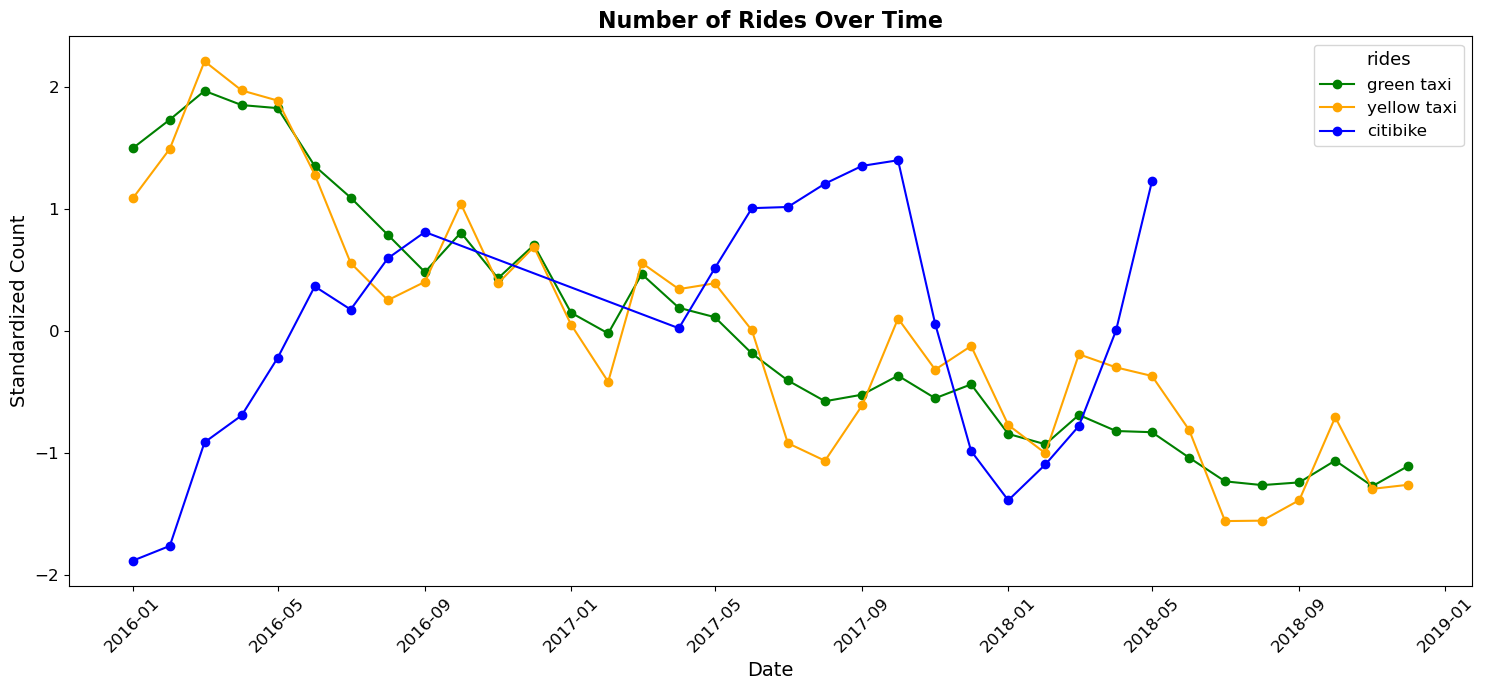

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
label_color = {"green taxi":"green","yellow taxi":"orange","citibike":"blue"}

### ChatGPT for the how to change the color to self-defined
for label in standardized_concat_df['label'].unique():
    df = standardized_concat_df[standardized_concat_df['label'] == label]
    plt.plot(df['month_year'], df['standardized_count'], marker='o', label=label, color = label_color[label])

plt.title('Number of Rides Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standardized Count', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.ticklabel_format(style='plain', axis='y')

plt.legend(title='rides', fontsize=12, title_fontsize='13')

plt.tight_layout()
plt.show()

A1:

We see that between 2016 and 2018, the popularity of both the green taxis and the yellow taxis was on the decline. This is consistent with our expectations. The proliferation of on-demand, ride hailing services such as Uber and Lyft had already begun shifting consumer preferences since the early 2010’s (Slate). This trend is one that continued through our chosen years of analysis and one that we can clearly observe in the data.

## Q2: How do the usage patterns change for yellow taxi, green taxi, and Citi bike throughout the day?

In [ ]:
green_rides_by_hour_df = df_green.where(F.col('year').isin([2016, 2017, 2018]))\
                  .groupBy('hour') \
                  .count() \
                  .orderBy('hour', ascending=True) \
                  .toPandas()

In [ ]:
yellow_rides_by_hour_df = df_yellow.where(F.col('year').isin([2016, 2017, 2018]))\
                  .groupBy('hour') \
                  .count() \
                  .orderBy('hour', ascending=True) \
                  .toPandas()

In [ ]:
citibike_rides_by_hour_df = df_citibike.where(F.col('year').isin([2016, 2017, 2018]))\
                  .groupBy('hour') \
                  .count() \
                  .orderBy('hour', ascending=True) \
                  .toPandas()

In [ ]:
green_rides_by_hour_df['label'] = 'green taxi'
yellow_rides_by_hour_df['label'] = 'yellow taxi'
citibike_rides_by_hour_df['label'] = 'citibike'

In [ ]:
import scipy
from scipy import stats

green_rides_by_hour_df['standardized_count'] = stats.zscore(green_rides_by_hour_df['count'])
yellow_rides_by_hour_df['standardized_count'] = stats.zscore(yellow_rides_by_hour_df['count'])
citibike_rides_by_hour_df['standardized_count'] = stats.zscore(citibike_rides_by_hour_df['count'])

In [ ]:
concat_hour_df = pd.concat([green_rides_by_hour_df, yellow_rides_by_hour_df, citibike_rides_by_hour_df], axis=0)

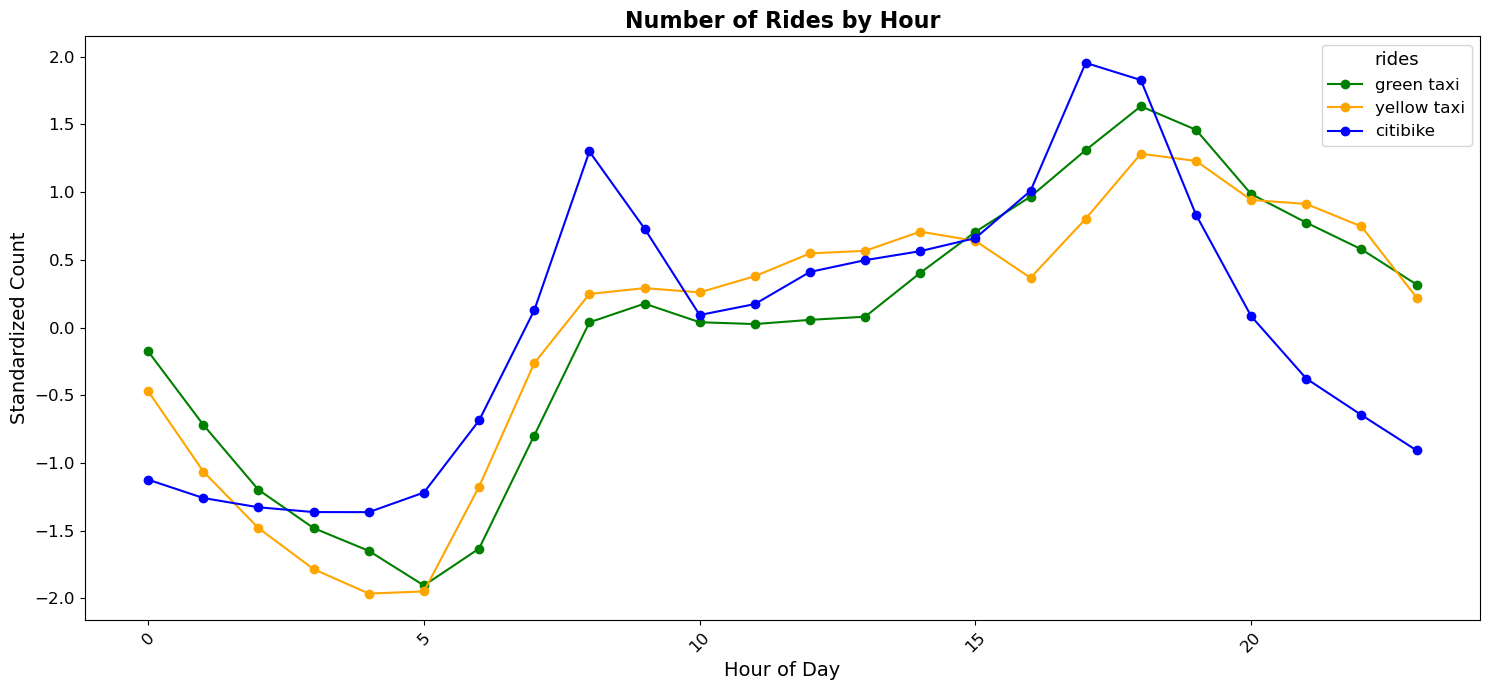

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
label_color = {"green taxi":"green","yellow taxi":"orange","citibike":"blue"}

### ChatGPT for the how to change the color to self-defined
for label in concat_hour_df['label'].unique():
    df = concat_hour_df[concat_hour_df['label'] == label]
    plt.plot(df['hour'], df['standardized_count'], marker='o', label=label, color = label_color[label])

plt.title('Number of Rides by Hour', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Standardized Count', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.ticklabel_format(style='plain', axis='y')

plt.legend(title='rides', fontsize=12, title_fontsize='13')

plt.tight_layout()
plt.show()

A2:

We can observe that three types of vehicles all appear to have a significant peak around 6pm, which is likely the evening when people are leaving work. The Citi Bike shows a slightly different pattern with an additional peak around 8am, indicating that biking is also common in the morning. After 6pm, Citi Bike usage declines sharply and remains low until 5am, suggesting very low usage during the late night to early morning hours, likely due to safety concerns or reduced demand. While taxi rides also decrease during these hours, the drop is not as sharp as Citi Bike usage and the usage remains high before 12am, suggesting that taxis are still a preferred type of transportation before midnight, possibly due to their perceived security and privacy at night.

## Q3: How do fare amounts vary for yellow and green taxis throughout different hours of the day?

In [ ]:
green_fee_by_hour_df = df_green.where(F.col('total_amount').isNotNull()).where(F.col('total_amount') != 0) \
                  .groupBy('hour') \
                  .agg(F.avg('total_amount').alias('Average fee')) \
                  .orderBy('hour', ascending=True) \
                  .toPandas()

In [ ]:
yellow_fee_by_hour_df = df_yellow.where(F.col('total_amount').isNotNull()).where(F.col('total_amount') != 0) \
                  .groupBy('hour') \
                  .agg(F.avg('total_amount').alias('Average fee')) \
                  .orderBy('hour', ascending=True) \
                  .toPandas()

In [ ]:
green_fee_by_hour_df['label'] = 'green taxi'
yellow_fee_by_hour_df['label'] = 'yellow taxi'

In [ ]:
concat_fee_df = pd.concat([green_fee_by_hour_df, yellow_fee_by_hour_df], axis=0)

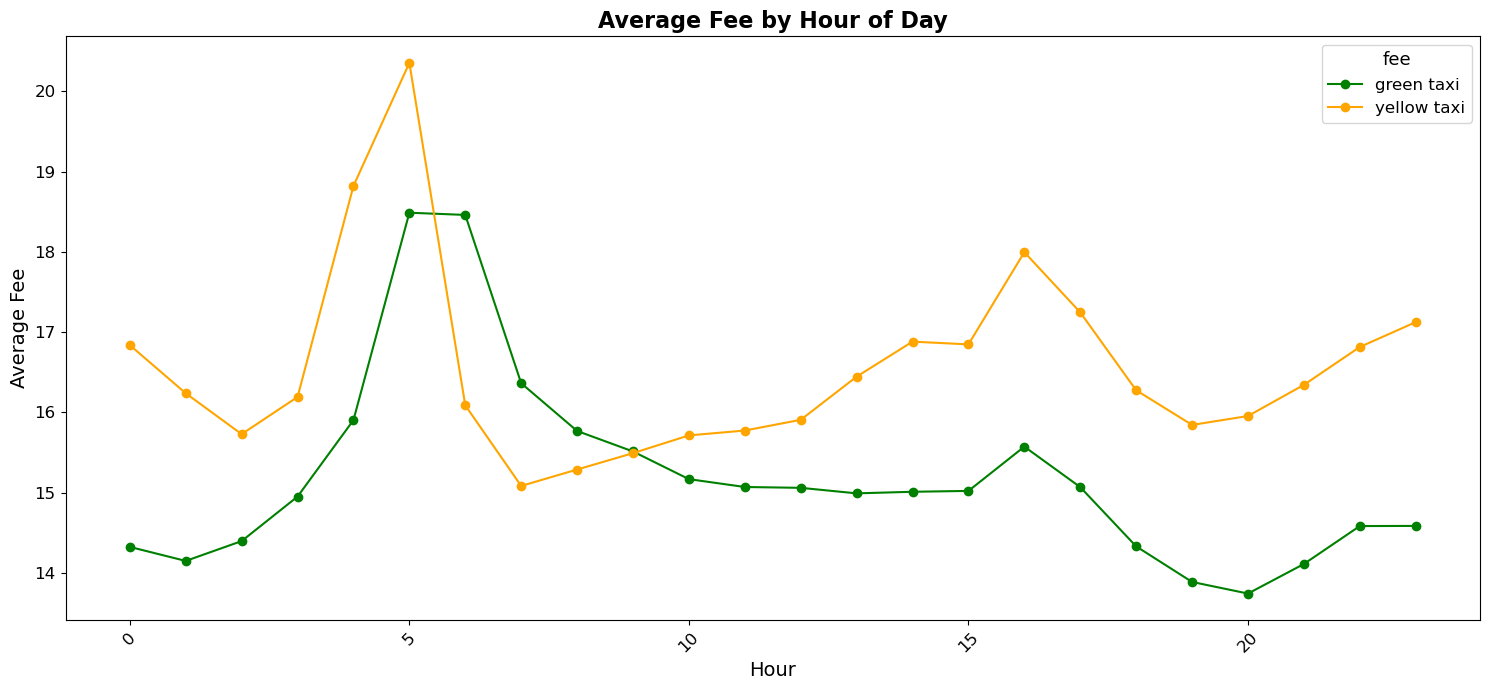

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
label_color = {"green taxi":"green","yellow taxi":"orange"}

### ChatGPT for the how to change the color to self-defined
for label in concat_fee_df['label'].unique():
    df = concat_fee_df[concat_fee_df['label'] == label]
    plt.plot(df['hour'], df['Average fee'], marker='o', label=label , color=label_color[label])

plt.title('Average Fee by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Average Fee', fontsize=14)

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.ticklabel_format(style='plain', axis='y')

plt.legend(title='fee', fontsize=12, title_fontsize='13')

plt.tight_layout()
plt.show()

A3:

The spikes in fare amounts correspond to the information presented in the prior chart, which signaled demand throughout different hours of the day. We can see that both yellow and green taxis follow similar trends in that they both have spikes around commute times.

What is interesting about average fares compared to the average rides per hour is that there is a greater spike in the mornings compared to in the evenings, suggesting that supply for taxis is much higher in the evenings. Also, yellow taxis tend to be more expensive than green taxis throughout the day. This lines up with our understanding of the relative markets served by green and yellow taxis in New York.    

## Q4: What are the popular months for park events? And what times of the day are most events organized?

In [ ]:
from pyspark.sql.functions import month

events = events.withColumn("month", month("date_event"))

In [ ]:
events_month_df = events.groupBy('month').count().orderBy('month', ascending=True).toPandas()

In [ ]:
from pyspark.sql.functions import hour

events = events.withColumn("hour", hour("start_datetime"))

In [ ]:
events_by_hour_df = events.groupBy('hour').count().orderBy('hour', ascending=True).toPandas()

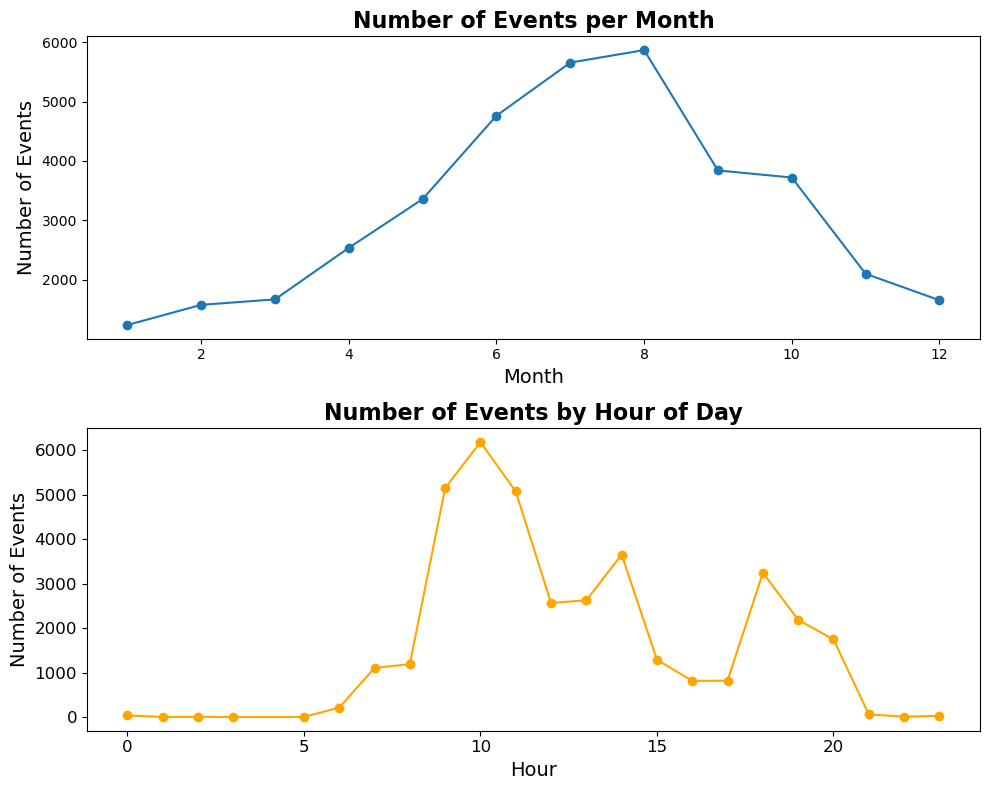

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

### ChatGPT
# Month:
axs[0].plot(events_month_df['month'], events_month_df['count'], label='Number of Events per Month', marker='o')
axs[0].set_title('Number of Events per Month', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Month', fontsize=14)
axs[0].set_ylabel('Number of Events', fontsize=14)
axs[0].tick_params(axis='x')
axs[0].tick_params(axis='y')

# Hour
axs[1].plot(events_by_hour_df['hour'], events_by_hour_df['count'], label='Number of Events by Hour of Day',color='orange', marker='o')
axs[1].set_title('Number of Events by Hour of Day', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Hour', fontsize=14)
axs[1].set_ylabel('Number of Events', fontsize=14)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

A4:

As we analyze the data from 2016 - 2018, we can observe that the number of park events organized increases from the months of May through August and declines after. This could be due to the favorable weather conditions for outdoor events during the summer and early fall months. From the overall data, the number of events organized gradually increases as the weather gets warmer.

From the hourly trends, we can observe that the most popular start time for park events is before noon, gradually increasing from 8am and reaching the peak at 10am. After 11am, we see a decline in the number of events. We assume this trend is due to people’s preference of spending some refreshing time at the park to start off their days. We also observed spikes in start times around 2pm and 6pm to 8pm. This is probably because people might go to the park around lunchtime to take a break from their work days and they have more leisure time in the evening after work to relax after a busy day.

## Q5: What are the trends of snowfall and precipitation throughout the years 2016-2018, and is there any relationship between the two?

In [ ]:
pandas_df = weather_filtered.toPandas()

df_2016 = weather_2016.toPandas()
df_2017 = weather_2017.toPandas()
df_2018 = weather_2018.toPandas()

In [ ]:
pandas_df

,date_weather,PRCP,SNOW,SNWD,TMIN,TMAX
0,2016-01-01,0.00,0.0,0.0,34,42
1,2016-01-02,0.00,0.0,0.0,32,40
2,2016-01-03,0.00,0.0,0.0,35,45
3,2016-01-04,0.00,0.0,0.0,14,36
4,2016-01-05,0.00,0.0,0.0,11,29
...,...,...,...,...,...,...
1091,2018-12-27,0.00,0.0,0.0,37,44
1092,2018-12-28,1.15,0.0,0.0,43,60
1093,2018-12-29,0.00,0.0,0.0,39,57
1094,2018-12-30,0.00,0.0,0.0,33,40


In [ ]:
pandas_df['DATE'] = pd.to_datetime(pandas_df['date_weather'])

pandas_df['YEAR'] = pandas_df['DATE'].dt.year
pandas_df['MONTH'] = pandas_df['DATE'].dt.month

monthly_precip = pandas_df.groupby(['YEAR', 'MONTH'])['PRCP'].sum().reset_index()

monthly_precip['MONTH_YEAR'] = pd.to_datetime(monthly_precip[['YEAR', 'MONTH']].assign(DAY=1))

monthly_snow = pandas_df.groupby(['YEAR', 'MONTH'])['SNOW'].sum().reset_index()

monthly_snow['MONTH_YEAR'] = pd.to_datetime(monthly_precip[['YEAR', 'MONTH']].assign(DAY=1))

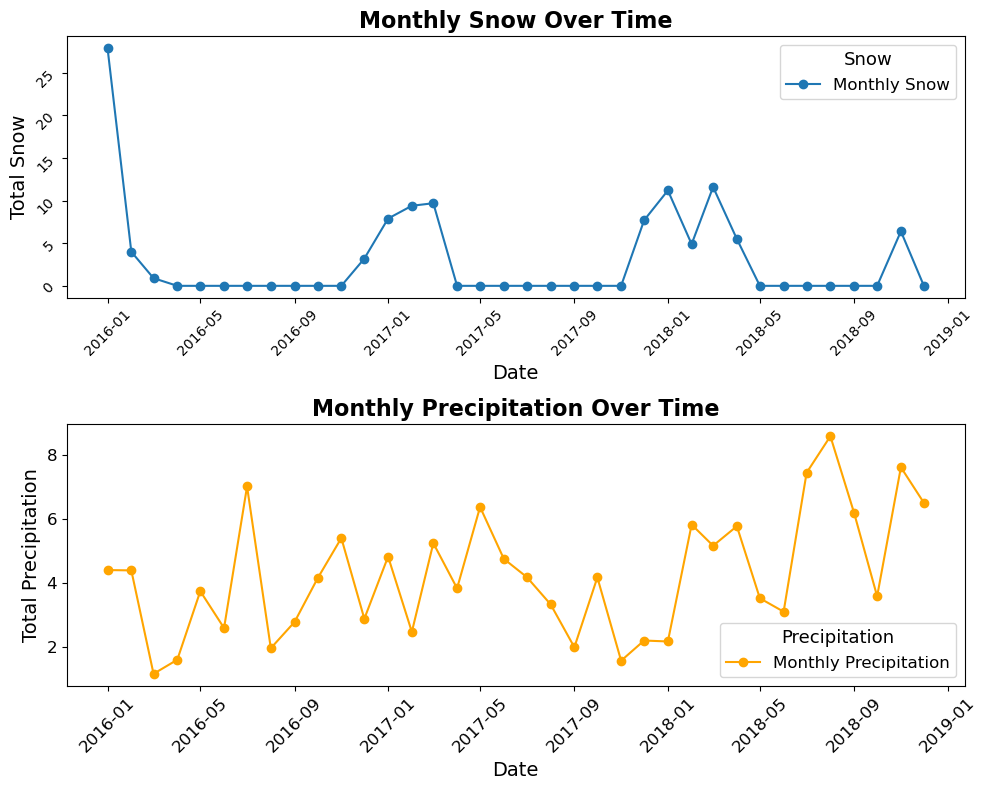

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10,8))

### ChatGPT
# Snow:
axs[0].plot(monthly_snow['MONTH_YEAR'], monthly_snow['SNOW'], label='Monthly Snow', marker='o')
axs[0].set_title('Monthly Snow Over Time', fontsize=16, fontweight='bold')
axs[0].set_xlabel('Date', fontsize=14)
axs[0].set_ylabel('Total Snow', fontsize=14)
axs[0].tick_params(axis='x', rotation=45)
axs[0].tick_params(axis='y', rotation=45)
axs[0].legend(title='Snow', fontsize=12, title_fontsize='13')

# Precipitation Plot
axs[1].plot(monthly_precip['MONTH_YEAR'], monthly_precip['PRCP'], label='Monthly Precipitation',color='orange', marker='o')
axs[1].set_title('Monthly Precipitation Over Time', fontsize=16, fontweight='bold')
axs[1].set_xlabel('Date', fontsize=14)
axs[1].set_ylabel('Total Precipitation', fontsize=14)
axs[1].tick_params(axis='x', rotation=45, labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].legend(title='Precipitation', fontsize=12, title_fontsize='13')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

A5:

The graph indicates that snowfall in New York City is concentrated from December to March, corresponding to the winter months. The precipitation graph shows higher variability and less obvious seasonality, suggesting that precipitation in this region may be influenced by other factors such as natural events rather than seasonal changes. Furthermore, the graph demonstrates that snowfall does not necessarily correlate with rainfall, implying that high precipitation does not always result in significant snowfall.

## Q.6. In what areas are Yellow Taxis, Green Taxis and CitiBikes used most often?

### Yellow Taxis Popularity

In [ ]:
# ChatGPT

import pandas as pd
import folium
import branca.colormap as cm


yellow_taxi.createOrReplaceTempView("yellow_taxi")

# Counting rides by pickup location and saving in pandas dataframe
yellow_taxi_rides = spark.sql("""
    SELECT pickup_location_id, COUNT(*) AS count
    FROM yellow_taxi
    GROUP BY pickup_location_id
""").toPandas()

# Merging with zone data
yellow_taxi_rides_by_zone = pd.merge(zone_gdf,yellow_taxi_rides,left_on='zone_id',right_on='pickup_location_id')

# Normalizing the taxi ride counts for color intensity mapping
max_rides = yellow_taxi_rides_by_zone['count'].max()
min_rides = yellow_taxi_rides_by_zone['count'].min()
yellow_taxi_rides_by_zone['normalized_count'] = (yellow_taxi_rides_by_zone['count'] - min_rides) / (max_rides - min_rides)

# Creating a color map
linear = cm.linear.YlOrRd_09.scale(min_rides, max_rides)
#linear = cm.linear.YlGn_09.scale(min_rides, max_rides)

# Creating a GeoDataFrame
gdf = gpd.GeoDataFrame(yellow_taxi_rides_by_zone, geometry='geometry')

# Creating a base map
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Adding polygons to the map
for _, row in gdf.iterrows():
    # Tooltip to display zone name, borough and number of rides
    tooltip_text = f'{row["zone_name"]}, {row["borough"]} - Rides: {row["count"]}'

    # Get color for the polygon based on number of rides
    color = linear(row['count'])

    folium.GeoJson(
        row['geometry'],
        style_function=lambda feature, color=color: {
            'fillColor': color,
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0.75,
        },
        tooltip=tooltip_text
    ).add_to(m)

# Adding the color map to the map
linear.add_to(m)

m.save("yellow_taxi_map.html")

In [3]:
#ChatGPT
# If you can't see the chart, please run the cell. You do not need to run the rest of the notebook. Thanks! :)

from IPython.display import IFrame

# Link to the raw HTML file on GitHub using Raw.githack.com
github_html_link = 'https://raw.githack.com/bonniyang/ba843/1e5a52276cad656f7f4ae59f173001db3bbb57c6/yellow_taxi_map.html'

# Display the HTML content using IFrame
IFrame(github_html_link, width=800, height=600)

The map of yellow taxis shows its dominance as the primary transportation method in New York when compared with green taxis. We see that in the most populace areas of New York such Midtown and the Upper East side, there is a huge concentration of pickups. Apart from this, yellow taxis are also doing a lot of pickups from both LaGuardia and JFK airports as well.

### Green Taxis Popularity

In [ ]:
# ChatGPT

import pandas as pd
import folium
import branca.colormap as cm
green_taxi.createOrReplaceTempView("green_taxi")

# Counting rides by pickup location and saving in pandas dataframe
green_taxi_rides = spark.sql("""
    SELECT pickup_location_id, COUNT(*) AS count
    FROM green_taxi
    GROUP BY pickup_location_id
""").toPandas()

# Merging with zone data
green_taxi_rides_by_zone = pd.merge(zone_gdf,green_taxi_rides,left_on='zone_id',right_on='pickup_location_id')

# Normalizing the taxi ride counts for color intensity mapping
max_rides = green_taxi_rides_by_zone['count'].max()
min_rides = green_taxi_rides_by_zone['count'].min()
green_taxi_rides_by_zone['normalized_count'] = (green_taxi_rides_by_zone['count'] - min_rides) / (max_rides - min_rides)

# Creating a color map
#linear = cm.linear.YlOrRd_09.scale(min_rides, max_rides)
linear = cm.linear.YlGn_09.scale(min_rides, max_rides)

# Creating a GeoDataFrame
gdf = gpd.GeoDataFrame(green_taxi_rides_by_zone, geometry='geometry')

# Creating a base map
m = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

# Adding polygons to the map
for _, row in gdf.iterrows():
    # Tooltip to display zone name, borough and number of rides
    tooltip_text = f'{row["zone_name"]}, {row["borough"]} - Rides: {row["count"]}'

    # Get color for the polygon based on number of rides
    color = linear(row['count'])

    folium.GeoJson(
        row['geometry'],
        style_function=lambda feature, color=color: {
            'fillColor': color,
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0.75,
        },
        tooltip=tooltip_text
    ).add_to(m)

# Adding the color map to the map
linear.add_to(m)

m.save("green_taxi_map.html")

24/04/29 18:18:28 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [2]:
#ChatGPT
# If you can't see the chart, please run the cell. You do not need to run the rest of the notebook. Thanks! :)

from IPython.display import IFrame

# Link to the raw HTML file on GitHub using Raw.githack.com
github_html_link = 'https://raw.githack.com/bonniyang/ba843/1e5a52276cad656f7f4ae59f173001db3bbb57c6/green_taxi_map.html'

# Display the HTML content using IFrame
IFrame(github_html_link, width=800, height=600)

The map for green taxis show that it is a niche service that operates mostly in Harlem and Queens. We also note that the overall volume of green taxis is not anywhere near yellow taxis.

### CitiBike Popularity (Most and Least Popular Stations)

In [ ]:
# ChatGPT

from shapely.geometry import Point
import geopandas as gpd
from folium import IFrame
import folium

df_trips.createOrReplaceTempView("df_trips")

start_station = spark.sql("""
SELECT
    start_station_name,
    COUNT(bikeid) AS usage_volume,
    AVG(start_station_latitude) AS start_lat,
    AVG(start_station_longitude) AS start_long
FROM
    df_trips
GROUP BY
    start_station_name
ORDER BY
    usage_volume
""").toPandas()

# Extracting the top 10 and bottom 10 stations
top10_start = start_station.tail(10)
bottom10_start = start_station.head(10)

# Converting locations into GeoDataFrames
top10_start_gdf = gpd.GeoDataFrame(
    top10_start,
    geometry=gpd.points_from_xy(top10_start.start_long, top10_start.start_lat)
)
bottom10_start_gdf = gpd.GeoDataFrame(
    bottom10_start,
    geometry=gpd.points_from_xy(bottom10_start.start_long, bottom10_start.start_lat)
)

# Creating a map centered around the average coordinates of all points
average_lat = top10_start['start_lat'].mean()
average_lon = top10_start['start_long'].mean()
m = folium.Map(location=[average_lat, average_lon], zoom_start=12)

# HTML to display as a title on the map
title_html = '''
             <h3 align="center" style="font-size:16px"><b>Popular and Least Popular CitiBike Stations in New York</b></h3>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# Adding a custom Legend
legend_html = '''
     <div style="position: fixed;
                 bottom: 50px; left: 50px; width: 150px; height: 90px;
                 border:2px solid grey; z-index:9999; font-size:14px;
                 ">&nbsp; <b>Station Popularity</b> <br>
                 &nbsp; Blue : Most Popular <br>
                 &nbsp; Red : Least Popular
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

# Add markers for the most popular stations
for idx, row in top10_start_gdf.iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_long']],
        popup=f"Most Popular: {row['start_station_name']}",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Add markers for the least popular stations
for idx, row in bottom10_start_gdf.iterrows():
    folium.Marker(
        location=[row['start_lat'], row['start_long']],
        popup=f"Least Popular: {row['start_station_name']}",
        icon=folium.Icon(color='red')
    ).add_to(m)

# Save the map
m.save("citibike_popularity_map.html")

In [1]:
#ChatGPT
# If you can't see the chart, please run the cell. You do not need to run the rest of the notebook. Thanks! :)

from IPython.display import IFrame

# Link to the raw HTML file on GitHub using Raw.githack.com
github_html_link = 'https://raw.githack.com/bonniyang/ba843/1e5a52276cad656f7f4ae59f173001db3bbb57c6/citibike_popularity_map.html'

# Display the HTML content using IFrame
IFrame(github_html_link, width=800, height=600)

The map for Citi Bike shows the 10 most and least popular stations for Citi Bikes throughout the city. The most interesting trend is the fact that popular stations are concentrated around the city centre in Manhattan, whereas least popular ones are spread out throughout the city.

## Q7. Do events have an impact on the prices of yellow and green taxis?

In [ ]:
# Converting events into pandas
events_df = events.toPandas()

# Converting the events DataFrame into a GeoDataFrame
events_gdf = gpd.GeoDataFrame(
    events_df,
    geometry=gpd.points_from_xy(events_df.long, events_df.lat)
)

# ChatGPT: Ensuring both GeoDataFrames use the same CRS
events_gdf.crs = zone_gdf.crs

# ChatGPT: Performing the spatial join
events_zone_gdf = gpd.sjoin(events_gdf, zone_gdf, how="inner", op="within")

# Removing irrelevant columns and display new GeoDataFrame
events_zone_gdf = events_zone_gdf.drop(columns = ['geometry', 'zone_geom', 'zip', 'index_right', 'date_event', 'start_time', 'end_time', 'title', 'lat', 'long', 'borough'])

# Converting to spark dataframe
events_zone = spark.createDataFrame(events_zone_gdf)

events_zone.createOrReplaceTempView("events_zone")

# Performing the join operation on yellow_taxi and events_zone
spark.sql("""
CREATE OR REPLACE TEMP VIEW yellow_events AS
SELECT
    y.total_amount,
    CASE
        WHEN e.event_id IS NOT NULL THEN TRUE
        ELSE FALSE
    END AS is_event_ongoing
FROM
    yellow_taxi AS y
LEFT JOIN
    events_zone AS e
ON
    y.pickup_datetime >= e.start_datetime AND
    y.pickup_datetime <= e.end_datetime AND
    y.pickup_location_id = e.zone_id
""")

# Group by the event presence and calculate average pricing
yellow_events_pricing = spark.sql("""
SELECT
    is_event_ongoing,
    AVG(total_amount) AS avg_total_amount
FROM
    yellow_events
GROUP BY
    is_event_ongoing
""").toPandas()


/opt/conda/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3472: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
# Performing the join operation on green_taxi and events_zone
spark.sql("""
CREATE OR REPLACE TEMP VIEW green_events AS
SELECT
    g.total_amount,
    CASE
        WHEN e.event_id IS NOT NULL THEN TRUE
        ELSE FALSE
    END AS is_event_ongoing
FROM
    green_taxi AS g
LEFT JOIN
    events_zone AS e
ON
    g.pickup_datetime >= e.start_datetime AND
    g.pickup_datetime <= e.end_datetime AND
    g.pickup_location_id = e.zone_id
""")

# Group by the event presence and calculate average pricing
green_events_pricing = spark.sql("""
SELECT
    is_event_ongoing,
    AVG(total_amount) AS avg_total_amount
FROM
    green_events
GROUP BY
    is_event_ongoing
""").toPandas()


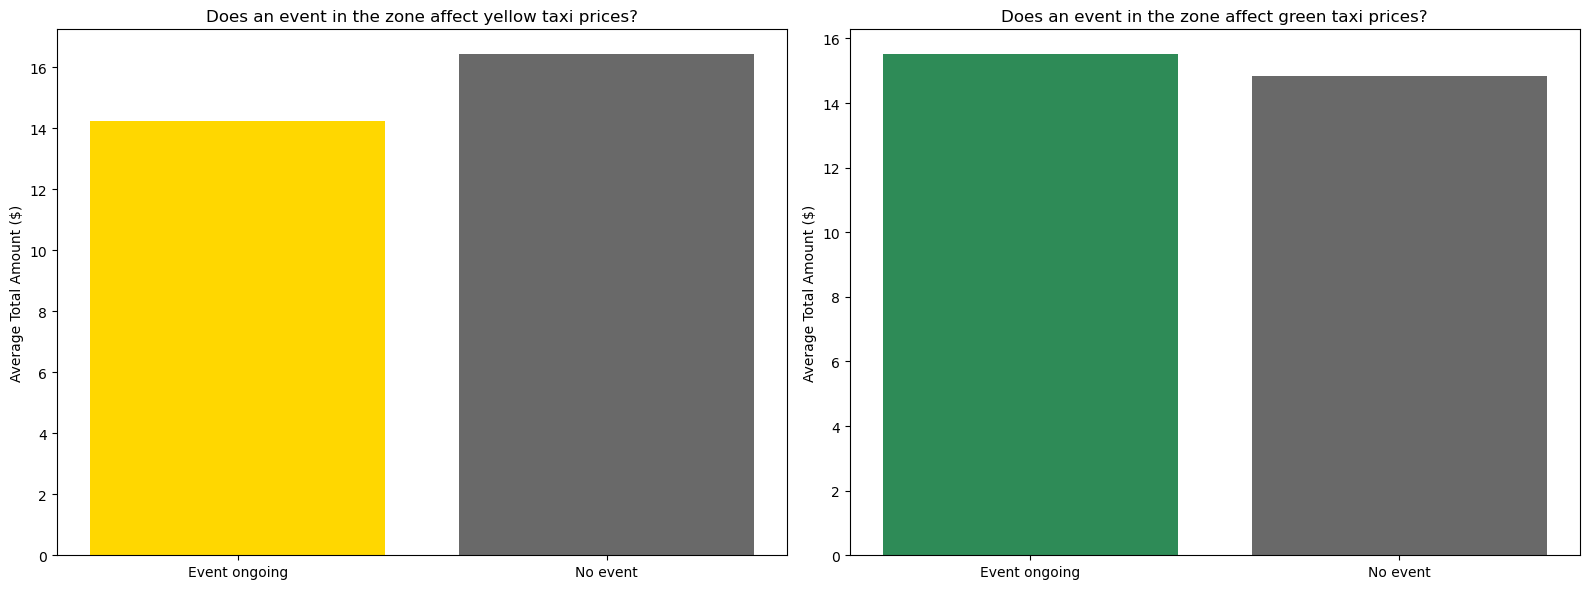

In [ ]:
# ChatGPT

import matplotlib.pyplot as plt

# ChatGPT: Converted to boolean since the order was getting randomized otherwise
green_events_pricing['is_event_ongoing'] = green_events_pricing['is_event_ongoing'].astype(str)
yellow_events_pricing['is_event_ongoing'] = yellow_events_pricing['is_event_ongoing'].astype(str)

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot yellow taxi data on the first subplot
axs[0].bar(yellow_events_pricing['is_event_ongoing'], yellow_events_pricing['avg_total_amount'], color=['gold', 'dimgray'])
axs[0].set_title('Does an event in the zone affect yellow taxi prices?')
#axs[0].set_xlabel('Is Event Ongoing')
axs[0].set_ylabel('Average Total Amount ($)')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Event ongoing', 'No event'])

# Plot green taxi data on the second subplot
axs[1].bar(green_events_pricing['is_event_ongoing'], green_events_pricing['avg_total_amount'], color=['seagreen', 'dimgray'])
axs[1].set_title('Does an event in the zone affect green taxi prices?')
#axs[1].set_xlabel('Is Event Ongoing')
axs[1].set_ylabel('Average Total Amount ($)')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Event ongoing', 'No event'])

plt.tight_layout()
plt.show()

A7:

The graph for yellow taxis shows that there is no increase in the average total fare for a yellow taxi ride when there is an event happening. And the graph for green taxis shows that there is less than a $1 increase in the average total fare for a green taxi ride. For our observation, we can conclude that an ongoing event doesn’t not significantly affect the taxi fares.

Going into this analysis, we expected the taxi demand during events would be higher and cause the prices to go up. This might be due to lack of pin-point information of the pick up locations, we had to judge the demand by the whole zone.

## Q8. How does weather affect transport choice?

### Yellow Taxi

In [ ]:
# getting date from date time
from pyspark.sql import functions as F
yellow_taxi = yellow_taxi.withColumn("pickup_date", F.to_date("pickup_datetime"))\
                       .withColumn("dropoff_date", F.to_date("dropoff_datetime"))

# joining green taxi and weather
yellow_weather = yellow_taxi.join(weather, yellow_taxi['pickup_date'] == weather['date_weather'],how ='left')
yellow_weather = yellow_weather.drop("date_weather")

daily_count = yellow_weather.where(F.col('year').isin([2016, 2017, 2018]))\
                                  .groupBy("pickup_date") \
                                  .count() \
                                  .orderBy("pickup_date") \
                                  .withColumnRenamed("pickup_date","date")

#temperature
temp = yellow_weather.where(F.col('year').isin([2016, 2017, 2018])).select('pickup_date','TMIN','TMAX')
temp = temp.groupby("pickup_date").agg(F.avg(F.col("TMIN")),F.avg(F.col("TMAX"))).orderBy("pickup_date")

temp_all = temp.join(daily_count,temp['pickup_date']== daily_count['date'],how ='left')
temp_all = temp_all.drop("pickup_date").toPandas()
temp_all["avg_temp"] = (temp_all["avg(TMIN)"] + temp_all["avg(TMAX)"]) / 2

#snow
snow = yellow_weather.where(F.col('year').isin([2016, 2017, 2018])).select('pickup_date','SNOW')
snow = snow.groupby("pickup_date").agg(F.avg(F.col("SNOW")).alias('Average Snow')).orderBy("pickup_date")

snow_all = snow.join(daily_count,snow['pickup_date']== daily_count['date'],how ='left')
snow_all = snow_all.drop("pickup_date").toPandas()

#precipitation
prcp = yellow_weather.where(F.col('year').isin([2016, 2017, 2018])).select('pickup_date','PRCP')
prcp = prcp.groupby("pickup_date").agg(F.avg(F.col("PRCP")).alias("average precipitation")).orderBy("pickup_date")

prcp_all = prcp.join(daily_count,prcp['pickup_date']== daily_count['date'],how ='left')
prcp_all = prcp_all.drop("pickup_date").toPandas()

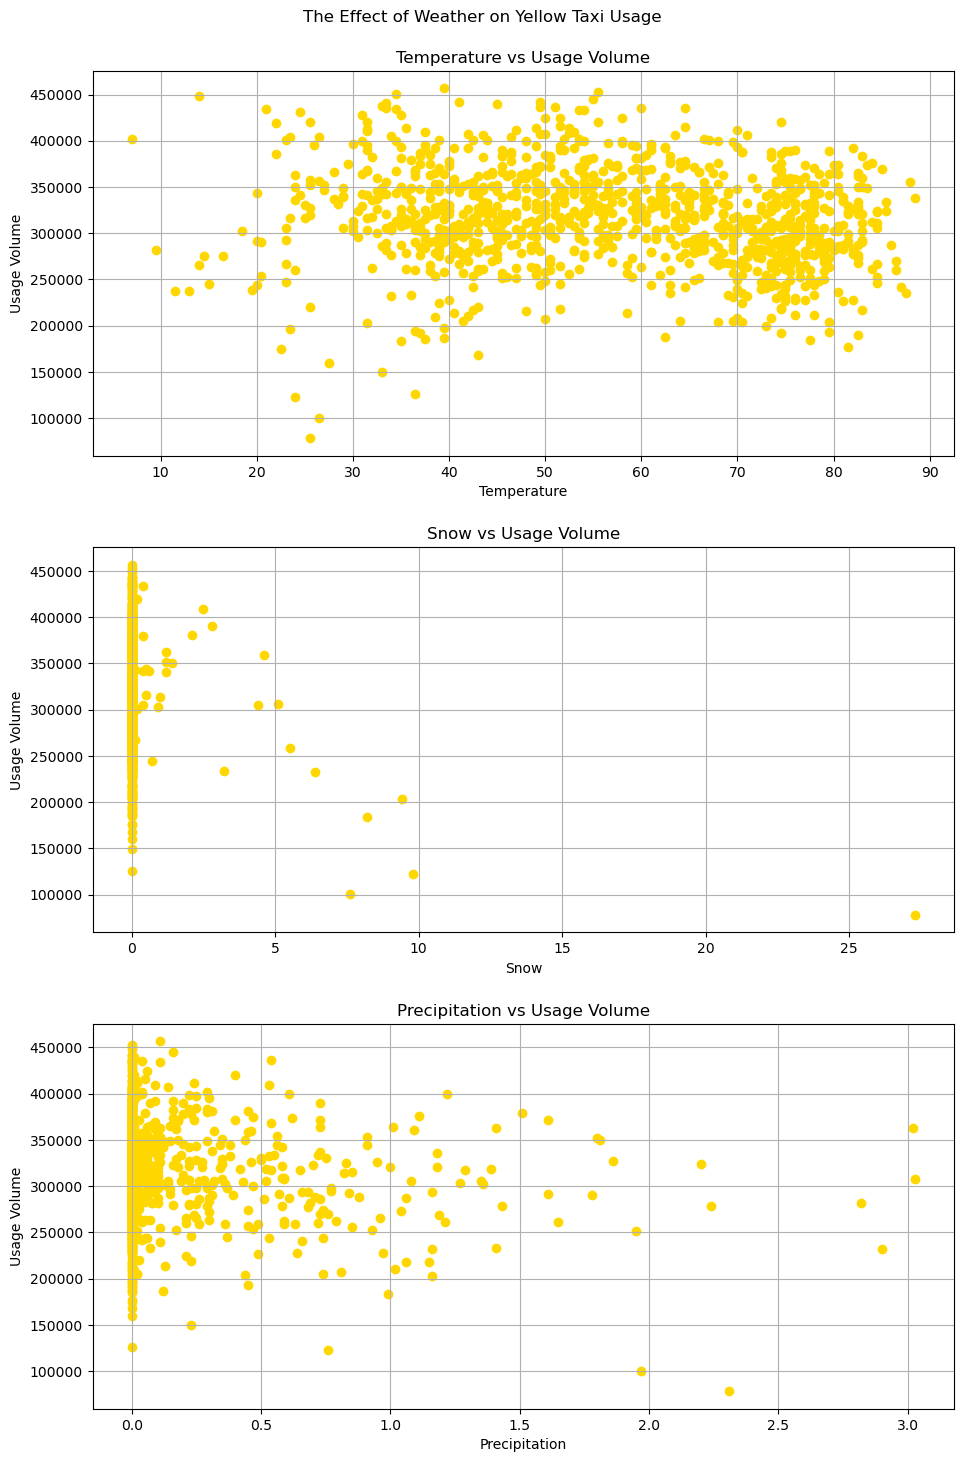

In [ ]:
# ChatGPT

import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# temperature / usage volumn
axes[0].scatter(temp_all["avg_temp"], temp_all["count"], color='gold')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Usage Volume')
axes[0].set_title('Temperature vs Usage Volume')
axes[0].grid()

# snow / usage volumn
axes[1].scatter(snow_all["Average Snow"], snow_all["count"], color='gold')
axes[1].set_xlabel('Snow')
axes[1].set_ylabel('Usage Volume')
axes[1].set_title('Snow vs Usage Volume')
axes[1].grid()

# precipitation / usage volumn
axes[2].scatter(prcp_all["average precipitation"], prcp_all["count"], color='gold')
axes[2].set_xlabel('Precipitation')
axes[2].set_ylabel('Usage Volume')
axes[2].set_title('Precipitation vs Usage Volume')
axes[2].grid()

fig.suptitle('The Effect of Weather on Yellow Taxi Usage')
plt.tight_layout(pad=2)
plt.show()

#### A8.1: Weather affects on Yellow Taxis

#### Temperature vs Usage Volume:

The plot shows a broad distribution of taxi usage volumes across a range of temperatures. There doesn't seem to be a consistent trend that indicates temperature has a significant impact on the volume of taxi usage. Usage volume is quite spread out, which could mean that temperature alone is not a major determinant in the decision to use yellow taxis.

#### Snow vs Usage Volume:

Taxi usage appears to be high with low to no snowfall. As snowfall increases, there is a sharp decline in usage volume. The majority of data points are clustered at the zero mark for snow, and very few data points exist for higher snowfall amounts. This suggests that heavy snowfall may significantly reduce the likelihood of choosing taxis as a mode of transportation, possibly due to safety concerns or reduced availability of taxis.

#### Precipitation vs Usage Volume:

We don't observe any notable trends of taxi usage being influenced by precipitation. This might be because precipitation does not affect the driving conditions as much as snow does.


### Green Taxi

In [ ]:
# getting date from date time
from pyspark.sql import functions as F
green_taxi = green_taxi.withColumn("pickup_date", F.to_date("pickup_datetime"))\
                       .withColumn("dropoff_date", F.to_date("dropoff_datetime"))

# joining green taxi and weather
green_weather = green_taxi.join(weather, green_taxi['pickup_date'] == weather['date_weather'],how ='left')
green_weather = green_weather.drop("date_weather")

daily_count = green_weather.where(F.col('year').isin([2016, 2017, 2018]))\
                                  .groupBy("pickup_date") \
                                  .count() \
                                  .orderBy("pickup_date") \
                                  .withColumnRenamed("pickup_date","date")

#temperature
temp = green_weather.where(F.col('year').isin([2016, 2017, 2018])).select('pickup_date','TMIN','TMAX')
temp = temp.groupby("pickup_date").agg(F.avg(F.col("TMIN")),F.avg(F.col("TMAX"))).orderBy("pickup_date")

temp_all = temp.join(daily_count,temp['pickup_date']== daily_count['date'],how ='left')
temp_all = temp_all.drop("pickup_date").toPandas()
temp_all["avg_temp"] = (temp_all["avg(TMIN)"] + temp_all["avg(TMAX)"]) / 2

#snow
snow = green_weather.where(F.col('year').isin([2016, 2017, 2018])).select('pickup_date','SNOW')
snow = snow.groupby("pickup_date").agg(F.avg(F.col("SNOW")).alias('Average Snow')).orderBy("pickup_date")

snow_all = snow.join(daily_count,snow['pickup_date']== daily_count['date'],how ='left')
snow_all = snow_all.drop("pickup_date").toPandas()

#precipitation
prcp = green_weather.where(F.col('year').isin([2016, 2017, 2018])).select('pickup_date','PRCP')
prcp = prcp.groupby("pickup_date").agg(F.avg(F.col("PRCP")).alias("average precipitation")).orderBy("pickup_date")

prcp_all = prcp.join(daily_count,prcp['pickup_date']== daily_count['date'],how ='left')
prcp_all = prcp_all.drop("pickup_date").toPandas()

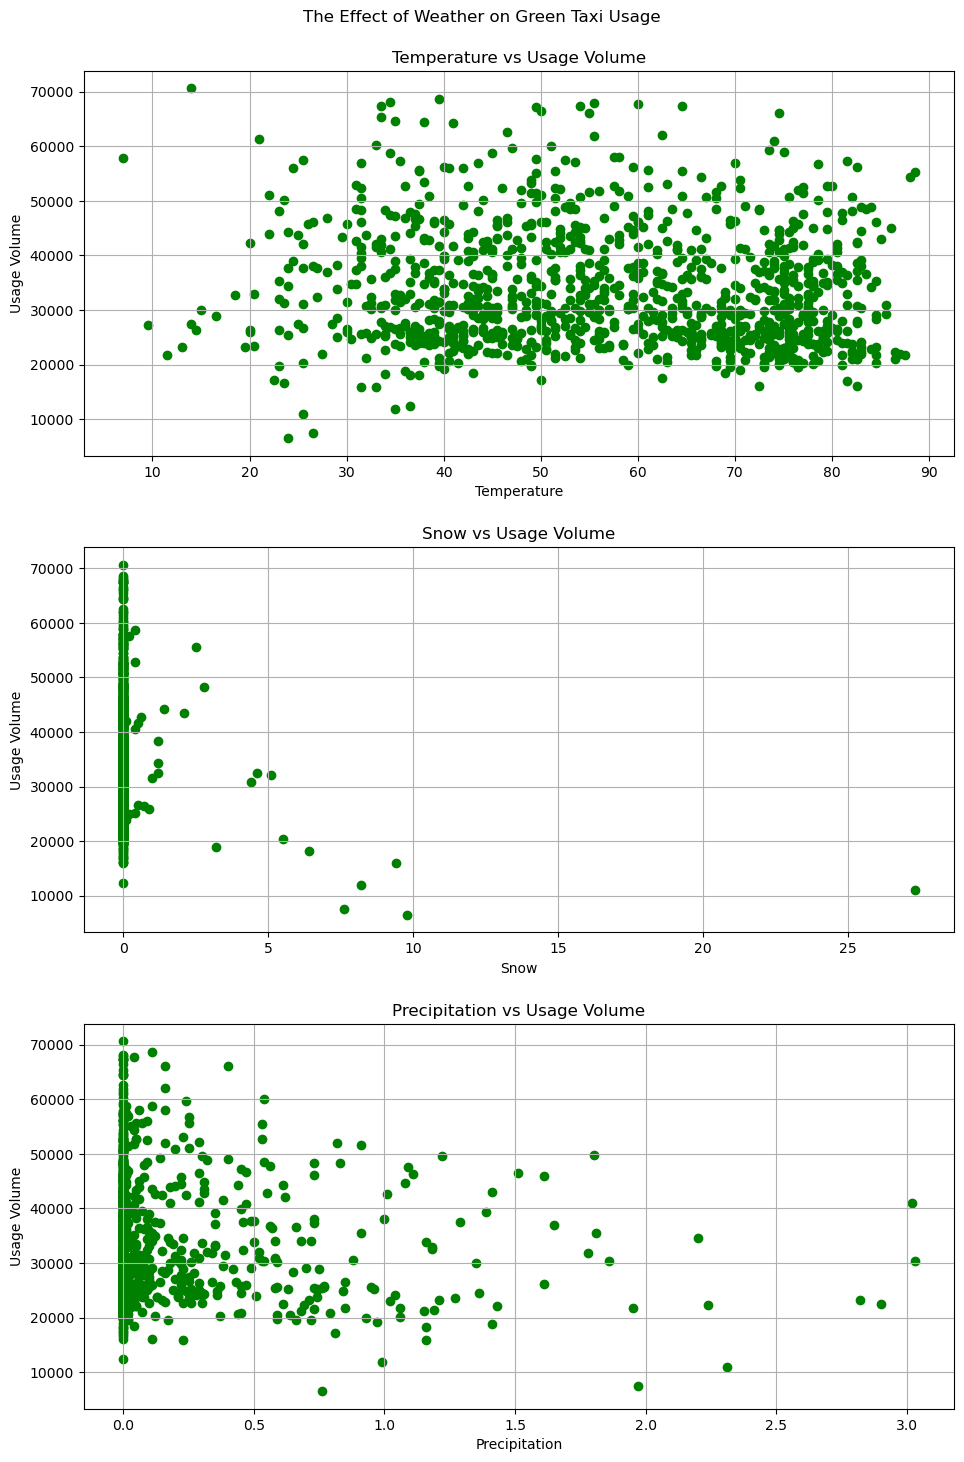

In [ ]:
# ChatGPT

import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# temperature / usage volumn
axes[0].scatter(temp_all["avg_temp"], temp_all["count"], color='green')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Usage Volume')
axes[0].set_title('Temperature vs Usage Volume')
axes[0].grid()

# snow / usage volumn
axes[1].scatter(snow_all["Average Snow"], snow_all["count"], color='green')
axes[1].set_xlabel('Snow')
axes[1].set_ylabel('Usage Volume')
axes[1].set_title('Snow vs Usage Volume')
axes[1].grid()

# precipitation / usage volumn
axes[2].scatter(prcp_all["average precipitation"], prcp_all["count"], color='green')
axes[2].set_xlabel('Precipitation')
axes[2].set_ylabel('Usage Volume')
axes[2].set_title('Precipitation vs Usage Volume')
axes[2].grid()

fig.suptitle('The Effect of Weather on Green Taxi Usage')
plt.tight_layout(pad=2)
plt.show()

#### A8.2: Weather affects on Green Taxis

#### Temperature vs Usage Volume:

Similar to yellow taxis, the distribution of usage volume is widespread across the range of temperatures. There appears to be a consistent volume of taxi usage regardless of temperature, indicating that temperature might not be a significant factor in the decision to use green taxis. It can be inferred that people choose green taxis at a relatively constant rate across different temperatures.

#### Snow vs Usage Volume:

There's a high concentration of usage volume data points at the lower end of snowfall, suggesting green taxis are used frequently when there is little to no snow. As the snowfall increases, the usage volume drops significantly, with fewer data points present at higher levels of snowfall. This indicates that snow has an adverse effect on the use of green taxis, likely due to similar reasons as with yellow taxis, such as safety, road conditions, and availability.

#### Precipitation vs Usage Volume:

Similar to yellow taxis, we don't observe any notable trends of taxi usage being influenced by precipitation. This might be because precipitation does not affect the driving conditions as much as snow does.

### Citi Bike

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id
trip_weather = df_trips.join(weather,df_trips['date'] == weather['date_weather'],how ='left')
trip_weather = trip_weather.drop("date_weather")

daily_count = trip_weather.select(monotonically_increasing_id().alias('id'),"date").groupBy("date").agg(count(col("id")).alias("usage volumn")).orderBy("date")
daily_count = daily_count.withColumnRenamed("date","date_daily_count")

# temperature
temp = trip_weather.select('date','TMIN','TMAX')
temp = temp.groupby("date").agg(avg(col("TMIN")),avg(col("TMAX"))).orderBy("date")

temp_all = temp.join(daily_count,temp['date']== daily_count['date_daily_count'],how ='left')
temp_all = temp_all.drop("date_daily_count").toPandas()
temp_all["avg_temp"] = (temp_all["avg(TMIN)"] + temp_all["avg(TMAX)"]) / 2

# snow
snow = trip_weather.select('date','SNOW')
snow = snow.groupby("date").agg(avg(col("SNOW")).alias("snow")).orderBy("date")

snow_all = snow.join(daily_count,snow['date']== daily_count['date_daily_count'],how ='left')
snow_all = snow_all.drop("date_daily_count").toPandas()

# precipitation
PRCP = trip_weather.select('date','PRCP')
PRCP = PRCP.groupby("date").agg(avg(col("PRCP")).alias("precipitation")).orderBy("date")

PRCP_all = PRCP.join(daily_count,PRCP['date']== daily_count['date_daily_count'],how ='left')
PRCP_all = PRCP_all.drop("date_daily_count").toPandas()

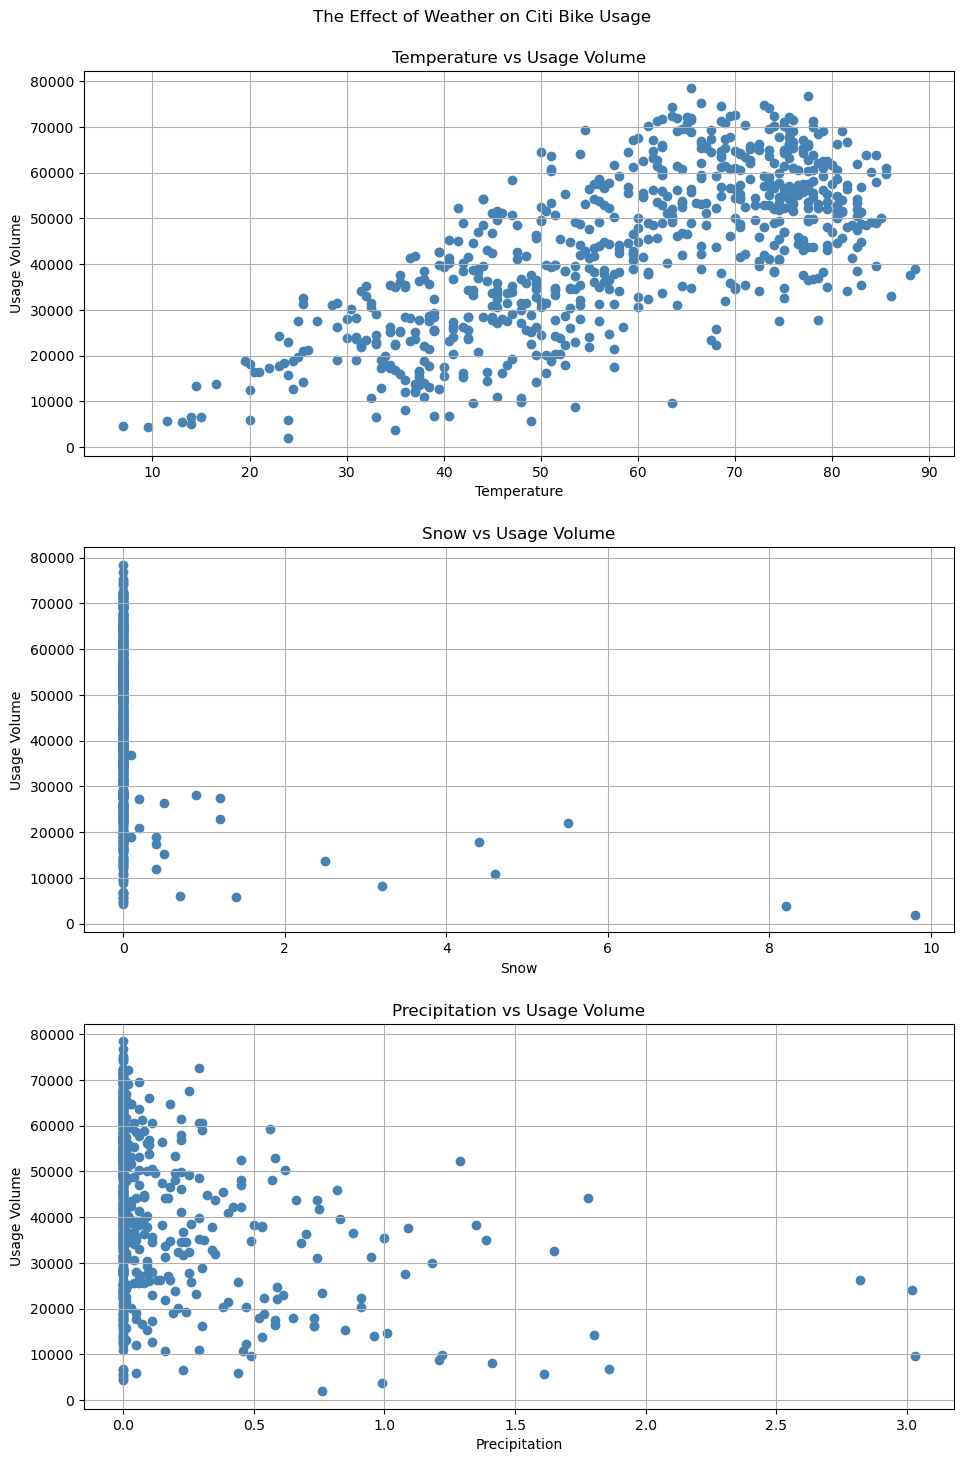

In [ ]:
# ChatGPT

import pandas as pd
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# temperature / usage volumn
axes[0].scatter(temp_all["avg_temp"], temp_all["usage volumn"], color='steelblue')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Usage Volume')
axes[0].set_title('Temperature vs Usage Volume')
axes[0].grid()

# snow / usage volumn
axes[1].scatter(snow_all["snow"], snow_all["usage volumn"], color='steelblue')
axes[1].set_xlabel('Snow')
axes[1].set_ylabel('Usage Volume')
axes[1].set_title('Snow vs Usage Volume')
axes[1].grid()

# precipitation / usage volumn
axes[2].scatter(PRCP_all["precipitation"], PRCP_all["usage volumn"], color='steelblue')
axes[2].set_xlabel('Precipitation')
axes[2].set_ylabel('Usage Volume')
axes[2].set_title('Precipitation vs Usage Volume')
axes[2].grid()

fig.suptitle('The Effect of Weather on Citi Bike Usage')
plt.tight_layout(pad=2)
plt.show()

#### A8.3: Weather affects on Citi Bikes

#### Temperature vs Usage Volume:

There is a trend indicating that as the temperature rises, Citi Bike usage also increases, with a higher concentration of data points at warmer temperatures. This suggests that milder temperatures are more conducive to cycling, likely due to comfort and the feasibility of riding a bike in warmer weather.

#### Snow vs Usage Volume:

A clear decline in bike usage is observed as snowfall increases. The highest concentration of usage is at zero snowfall, with very few data points once any significant amount of snow is present. This indicates that snow is a strong deterrent for bike usage, which is expected due to the difficulty and danger of cycling on snowy roads.

#### Precipitation vs Usage Volume:

Similarly to snow, as the amount of precipitation increases, Citi Bike usage decreases, although there are still some instances of moderate bike usage with low levels of precipitation. This could be due to riders being willing to tolerate light rain, but as rainfall becomes heavier, alternative forms of transportation are likely preferred.

## Q9: Has Citi Bike been able to build a loyal customer base?

In [ ]:
df_trips.createOrReplaceTempView("trips")

sql_query = """
    SELECT usertype AS ussertype, COUNT(*) AS count
    FROM (
        SELECT monotonically_increasing_id() AS id, usertype
        FROM trips
        WHERE usertype IS NOT NULL
    ) AS subquery
    GROUP BY usertype
"""

result = spark.sql(sql_query)
df_usertype = result.toPandas()
df_usertype

,ussertype,count
0,Subscriber,26632968
1,Customer,3419383


In [ ]:
df_trips.createOrReplaceTempView("trips")

sql_query = """
    SELECT monotonically_increasing_id() AS id,
           CASE
               WHEN date_format(starttime, 'EEEE') IN ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday') THEN 'weekday'
               ELSE 'weekend'
           END AS week_end_day,
           hour(starttime) AS start_hour
    FROM trips
"""

result = spark.sql(sql_query)

result.createOrReplaceTempView("temp_view")
sql_query = """
    SELECT week_end_day, start_hour, count(id) AS usage_volume
    FROM temp_view
    GROUP BY week_end_day, start_hour
    ORDER BY week_end_day, start_hour
"""

weekend_day_commute = spark.sql(sql_query).toPandas()

weekday_day = weekend_day_commute[weekend_day_commute['week_end_day'] == 'weekday']
weekend_end = weekend_day_commute[weekend_day_commute['week_end_day'] == 'weekend']

weekend_day_commute

,week_end_day,start_hour,usage_volume
0,weekday,0,156620
1,weekday,1,73897
2,weekday,2,38709
3,weekday,3,23170
4,weekday,4,32920
5,weekday,5,163118
6,weekday,6,608565
7,weekday,7,1274764
8,weekday,8,2217291
9,weekday,9,1591321


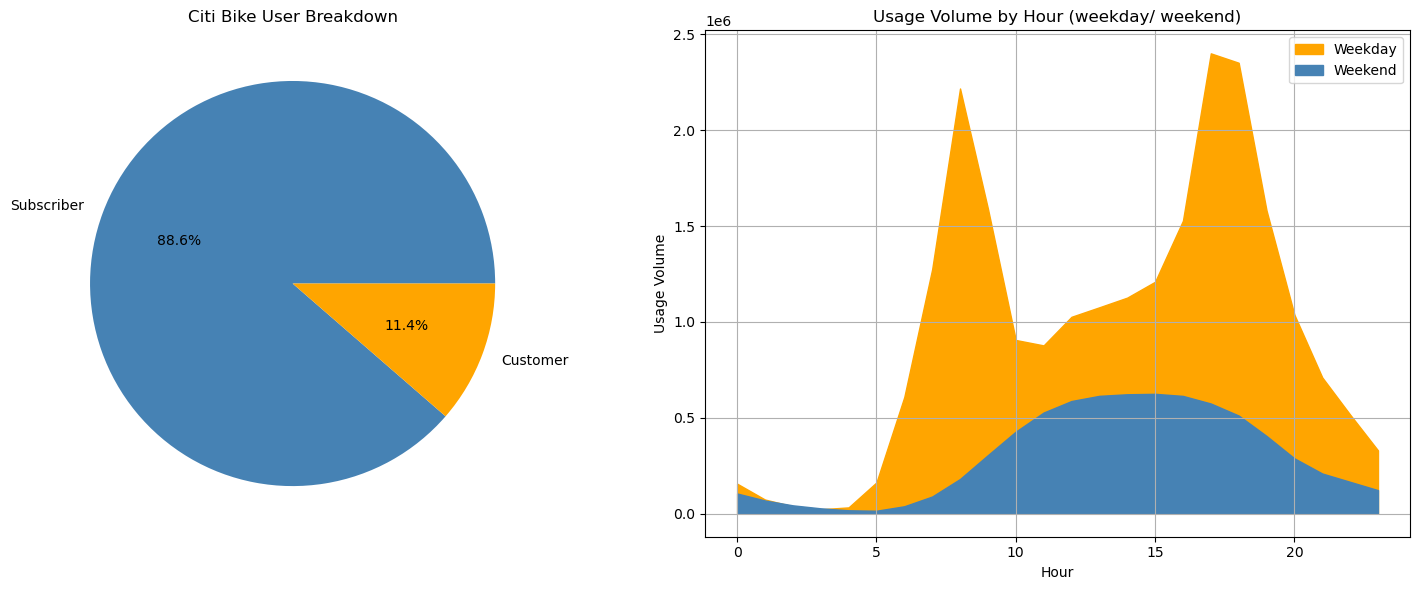

In [ ]:
# ChatGPT

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axes[0].pie(df_usertype['count'], labels=df_usertype['ussertype'], autopct='%1.1f%%', colors=['steelblue', 'orange'])
axes[0].set_title('Citi Bike User Breakdown')

axes[1].fill_between(weekday_day['start_hour'], weekday_day['usage_volume'], color='orange', label='Weekday')
axes[1].fill_between(weekend_end['start_hour'], weekend_end['usage_volume'], color='steelblue', label='Weekend')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('Usage Volume')
axes[1].set_title('Usage Volume by Hour (weekday/ weekend)')
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()

A9:

The pie chart indicates that 88.6% of the users are subscribers, while 11.4% are customers. The term "subscriber" typically refers to individuals who hold a recurring membership or pass, suggesting a longer-term commitment to the service. In contrast, "customers" might refer to occasional users or those who use the service on a one-off basis, such as tourists or non-regular users. The high percentage of subscribers suggests that Citi Bike has successfully established a strong and loyal customer base, as a significant majority of users are committed enough to the service to subscribe. This subscription model provides a stable revenue stream and indicates user satisfaction and habitual use.

The Usage Volume by Hour chart complements this by showing distinct usage patterns on weekdays versus weekends. During weekdays, there are two pronounced peaks, typically associated with commuting hours (morning and late afternoon/evening). On weekends, the usage volume is more evenly distributed throughout the day, with a wider peak, which could indicate more recreational or non-commute trips.

Together, these charts suggest that Citi Bike is a preferred mode of daily commute for a substantial subscriber base during weekdays, and it caters to a more varied schedule of use on weekends, likely including both subscribers and casual customers. The presence of a substantial and consistent subscriber base is a strong indicator of a loyal customer base for Citi Bike.

## Q10. Are New Yorkers adopting credit cards to pay for taxi rides?

### Yellow Taxi

In [ ]:
yellow_taxi.createOrReplaceTempView("yellow_taxi")

payment_type_revenue = spark.sql("""SELECT payment_type, AVG(total_amount) as average_fee, COUNT(*) AS count
                      FROM yellow_taxi
                      WHERE payment_type IN (1,2)
                      GROUP BY payment_type"""
                      ).toPandas()

payment_type_mapping = {
    1: 'Credit Card',
    2: 'Cash',
}

payment_type_revenue['payment_type'] = payment_type_revenue['payment_type'].replace(payment_type_mapping)

24/04/29 08:15:34 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


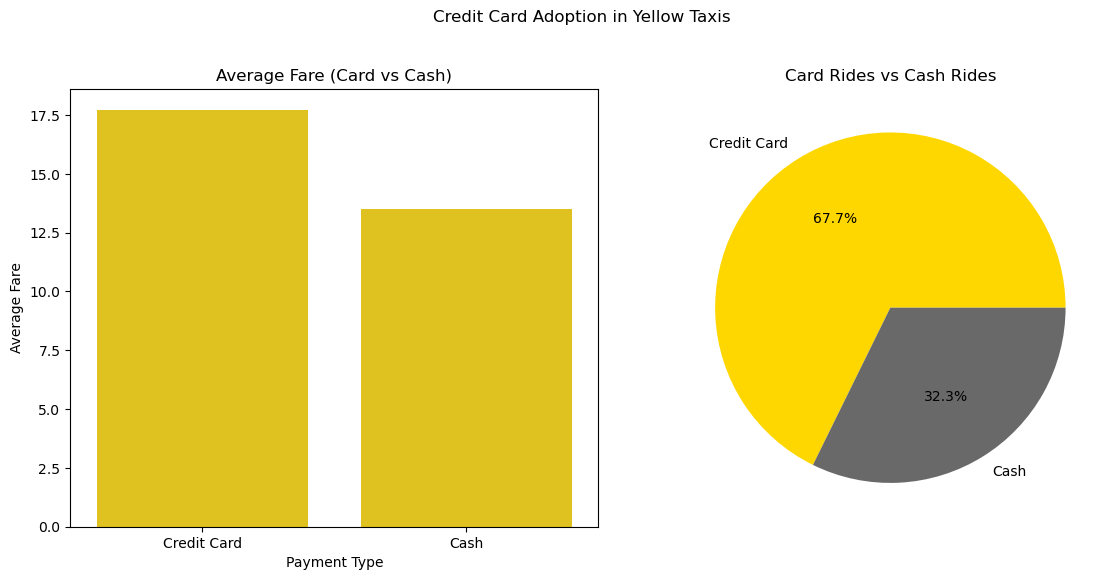

In [ ]:
# ChatGPT

import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(
    x='payment_type',
    y='average_fee',
    data=payment_type_revenue,
    ax=axes[0],
    color='gold'
)
axes[0].set_title("Average Fare (Card vs Cash)")
axes[0].set_xlabel('Payment Type')
axes[0].set_ylabel('Average Fare')


pie_data = payment_type_revenue.set_index("payment_type")
axes[1].pie(
    pie_data['count'],
    labels=pie_data.index,
    autopct='%1.1f%%',
    colors=['gold', 'dimgray']
)
axes[1].set_title("Card Rides vs Cash Rides")

plt.suptitle('Credit Card Adoption in Yellow Taxis')
plt.tight_layout(pad=2)
plt.show()

### Green Taxi

In [ ]:
green_taxi.createOrReplaceTempView("green_taxi")

payment_type_revenue = spark.sql("""SELECT payment_type, AVG(total_amount) as average_fee, COUNT(*) AS count
                      FROM green_taxi
                      WHERE payment_type IN (1,2)
                      GROUP BY payment_type"""
                      ).toPandas()

payment_type_mapping = {
    1: 'Credit Card',
    2: 'Cash',
}

payment_type_revenue['payment_type'] = payment_type_revenue['payment_type'].replace(payment_type_mapping)

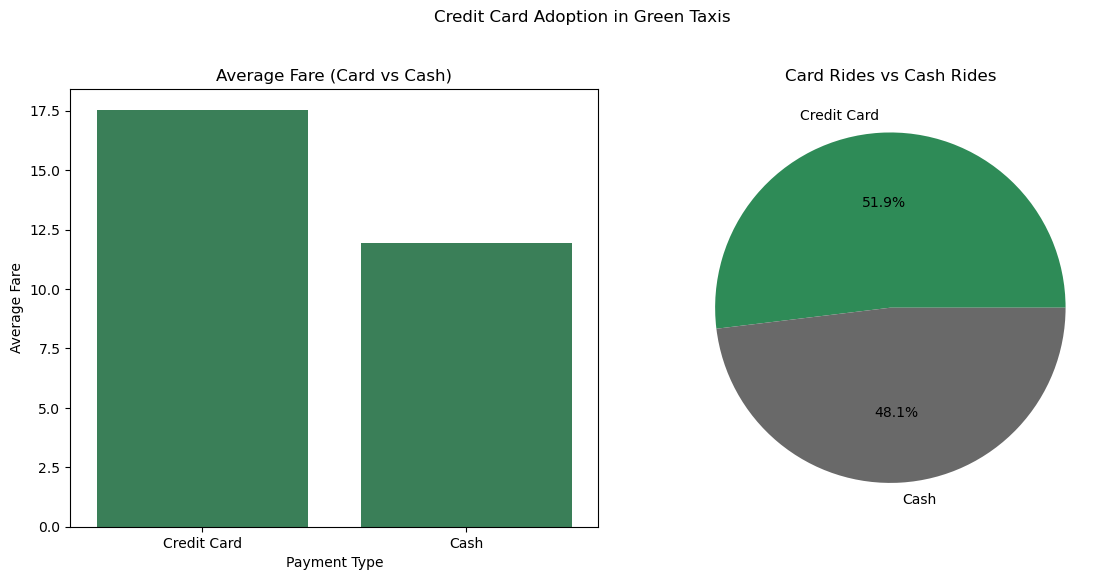

In [ ]:
#ChatGPT

import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(
    x='payment_type',
    y='average_fee',
    data=payment_type_revenue,
    ax=axes[0],
    color='seagreen'
)
axes[0].set_title("Average Fare (Card vs Cash)")
axes[0].set_xlabel('Payment Type')
axes[0].set_ylabel('Average Fare')


pie_data = payment_type_revenue.set_index("payment_type")
axes[1].pie(
    pie_data['count'],
    labels=pie_data.index,
    autopct='%1.1f%%',
    colors=['seagreen', 'dimgray']
)
axes[1].set_title("Card Rides vs Cash Rides")

plt.suptitle('Credit Card Adoption in Green Taxis')
plt.tight_layout(pad=2)
plt.show()

A10:

The data provided in the charts indicates a clear preference for credit card payments over cash for taxi rides, both in green and yellow taxis.

In the first set of charts for yellow taxis, we see that:
The average fare for rides paid with credit cards is higher than for those paid with cash.
A larger proportion of rides are paid for with credit cards (67.7%) compared to cash (32.3%).


The second set of charts for green taxis shows a similar pattern:
The average fare paid by credit card is higher than the average fare paid by cash.
The percentage of rides paid with credit cards is similar to that of yellow taxis, with 51.9% of rides being paid by card and 48.1% with cash.

These figures strongly suggest that New Yorkers are adopting credit cards as their preferred method of payment for taxi rides. The convenience of using credit cards, along with the potential for tracking expenses and the safety of not carrying cash, are likely contributing factors to this trend. The higher average fare for credit card payments might also reflect less hesitancy to spend more when paying with a card. Overall, the data indicates a solid adoption of credit card payments in the taxi industry.

# Price Prediction Regression

## Feature Engineering

In this section, we will calculate the duration of each ride, categorize weekday and weekend rides, calculate the number of rides in past hour, categorize weather, and approximate if there is an event at the pick up location.

We also took a 1% sample for the regression and for a complex calculation relating to calculating the number of rides in the past hour. This left us with approximately 3.5 million rows.

In [ ]:
yellow_taxi = yellow_taxi.select('pickup_datetime', 'dropoff_datetime', 'trip_distance', 'payment_type', 'total_amount', 'year', 'month', 'hour', 'pickup_location_id')

In [ ]:
yellow_taxi = yellow_taxi.where(yellow_taxi.payment_type.isin([1,2]))

### Duration Calculation

In [ ]:
from pyspark.sql.functions import col, unix_timestamp, format_string

yellow_taxi = yellow_taxi.withColumn("duration_seconds",
                   unix_timestamp("dropoff_datetime") - unix_timestamp("pickup_datetime"))

### Weekday/Weekend Categorization

In [ ]:
from pyspark.sql.functions import col, dayofweek, when

yellow_taxi = yellow_taxi.withColumn("day_type",
                   when((dayofweek("pickup_datetime") == 1) | (dayofweek("pickup_datetime") == 7), "Weekend")
                   .otherwise("Weekday"))

In [ ]:
yellow_taxi.show(2)

+-------------------+-------------------+-------------+------------+------------+----+-----+----+------------------+----------------+--------+
|    pickup_datetime|   dropoff_datetime|trip_distance|payment_type|total_amount|year|month|hour|pickup_location_id|duration_seconds|day_type|
+-------------------+-------------------+-------------+------------+------------+----+-----+----+------------------+----------------+--------+
|2016-03-23 11:04:04|2016-03-23 11:43:28|         25.3|           1|      150.34|2016|    3|  11|               138|            2364| Weekday|
|2016-03-09 07:38:59|2016-03-09 08:41:04|         16.2|           1|       66.36|2016|    3|   7|               132|            3725| Weekday|
+-------------------+-------------------+-------------+------------+------------+----+-----+----+------------------+----------------+--------+
only showing top 2 rows



### Sampling for Regression

In [ ]:
yt_sample = yellow_taxi.sample(fraction = 0.01)

In [ ]:
yt_sample.count()

3448798

### Rides in Past Hour Calculation

In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import unix_timestamp

# Define a window specification that sequences pickups in an hour
windowSpec = Window.orderBy(unix_timestamp("pickup_datetime")) \
                   .rangeBetween(-3600, 0)

yt_sample = yt_sample.withColumn("rides_in_past_hour",
                                     count("pickup_datetime").over(windowSpec))

### Weather Categorization

In [ ]:
weather_filtered = weather_filtered.withColumn('AVG_TEMP', (col("TMIN") + col("TMAX")) / 2)

In [ ]:
weather_filtered = weather_filtered.withColumn("WEATHER CONDITION",
                   when((col("PRCP") == 0) & (col("SNOW") == 0), "Clear")
                   .when((col("PRCP") > 0) & (col("SNOW") == 0), "Raining")
                   .when(col("SNOW") > 0, "Snowing"))

In [ ]:
weather_filtered.show()

+------------+----+----+----+----+----+--------+-----------------+
|date_weather|PRCP|SNOW|SNWD|TMIN|TMAX|AVG_TEMP|WEATHER CONDITION|
+------------+----+----+----+----+----+--------+-----------------+
|  2016-01-01| 0.0| 0.0| 0.0|  34|  42|    38.0|            Clear|
|  2016-01-02| 0.0| 0.0| 0.0|  32|  40|    36.0|            Clear|
|  2016-01-03| 0.0| 0.0| 0.0|  35|  45|    40.0|            Clear|
|  2016-01-04| 0.0| 0.0| 0.0|  14|  36|    25.0|            Clear|
|  2016-01-05| 0.0| 0.0| 0.0|  11|  29|    20.0|            Clear|
|  2016-01-06| 0.0| 0.0| 0.0|  25|  41|    33.0|            Clear|
|  2016-01-07| 0.0| 0.0| 0.0|  31|  46|    38.5|            Clear|
|  2016-01-08| 0.0| 0.0| 0.0|  31|  46|    38.5|            Clear|
|  2016-01-09| 0.0| 0.0| 0.0|  40|  47|    43.5|            Clear|
|  2016-01-10| 1.8| 0.0| 0.0|  40|  59|    49.5|          Raining|
|  2016-01-11| 0.0| 0.0| 0.0|  26|  40|    33.0|            Clear|
|  2016-01-12| 0.0| 0.0| 0.0|  25|  44|    34.5|            Cl

In [ ]:
# Convert 'pickup_datetime' to a date type (without time) for joining
yt_sample = yt_sample.withColumn("pickup_date", to_date("pickup_datetime"))

# Join the DataFrames on the date column
yellow_with_weather = yt_sample.join(weather_filtered, yt_sample.pickup_date == weather_filtered.date_weather, "inner")
yellow_with_weather = yellow_with_weather.drop('PRCP','SNOW','SNWD','TMIN','TMAX', 'pickup_date', 'date_weather')

### Is Event Ongoing in Zone

In [ ]:
events_zone.show(5)

+--------+-------------------+-------------------+-----+----+-------+---------+
|event_id|     start_datetime|       end_datetime|month|hour|zone_id|zone_name|
+--------+-------------------+-------------------+-----+----+-------+---------+
|  119432|2016-03-21 15:00:00|2016-03-21 18:00:00|    3|  15|    195| Red Hook|
|  161908|2018-04-11 10:00:00|2018-04-11 11:00:00|    4|  10|    195| Red Hook|
|  119395|2016-01-28 15:00:00|2016-01-28 18:00:00|    1|  15|    195| Red Hook|
|  119430|2016-03-17 15:00:00|2016-03-17 18:00:00|    3|  15|    195| Red Hook|
|  129600|2016-06-25 20:30:00|2016-06-25 22:30:00|    6|  20|    195| Red Hook|
+--------+-------------------+-------------------+-----+----+-------+---------+
only showing top 5 rows



In [ ]:
# Perform the join operation
final_df = yellow_with_weather.alias('pickup').join(
    events_zone.alias('event'),
    (F.col('pickup.pickup_datetime') >= F.col('event.start_datetime')) &
    (F.col('pickup.pickup_datetime') <= F.col('event.end_datetime')) &
    (F.col('pickup.pickup_location_id') == F.col('event.zone_id')),
    how='left'  # left join because we want all pickups regardless of whether or not there is an event
)

final_df = final_df.withColumn(
    "is_event_ongoing",
    F.when(
        F.col('event.event_id').isNotNull(),
        True
    ).otherwise(False)
)

final_df = final_df.select('trip_distance', 'payment_type', 'year', 'pickup.month', 'pickup.hour', 'duration_seconds', 'day_type', 'rides_in_past_hour', 'AVG_TEMP', 'WEATHER CONDITION', 'is_event_ongoing', 'total_amount')

In [ ]:
final_df.limit(3).toPandas()

24/04/29 09:04:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:04:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:04:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:04:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:04:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:04:28 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 0

,trip_distance,payment_type,year,month,hour,duration_seconds,day_type,rides_in_past_hour,AVG_TEMP,WEATHER CONDITION,is_event_ongoing,total_amount
0,3.70,1,2016,1,0,602,Weekday,1,38.0,Clear,False,20.0
1,0.56,2,2016,1,0,212,Weekday,2,38.0,Clear,False,5.8
2,1.10,2,2016,1,0,157,Weekday,3,38.0,Clear,False,6.3


## Regression

After the feature engineering, we ran a simple linear regression with all of the features. This was performing very poorly with an R^2 score of around 3.6% and an RMSE of \$14 for an average fare amount of \$16.5.

After this, we simplified the data that was being fed into the model by running a linear regression with only the ride duration and the ride distance. However, this was performing even worse with an R^2 score of less than 2%.

It became clear that the model was under fitting, so we opted to go with a more complex model - the random forest regressor with all of the features. This was performing much better with an RMSE of \$6.7 and an R^2 score of 78%.*italicized text*

### Linear Regression with all features

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col

# Casting 'is_event_ongoing' to string
final_df = final_df.withColumn("is_event_ongoing", col("is_event_ongoing").cast("string"))

#One hot encoding categorical columns
categoricalColumns = ['payment_type', 'year', 'month', 'hour', 'day_type', 'WEATHER CONDITION', 'is_event_ongoing']
indexers = [StringIndexer(inputCol=c, outputCol=c+"_index") for c in categoricalColumns]
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=indexer.getInputCol()+"_ohe") for indexer in indexers]

# ChatGPT: Assemble all the input columns (features) into a single vector column
assemblerInputs = [c + "_ohe" for c in categoricalColumns] + ['trip_distance', 'duration_seconds', 'rides_in_past_hour', 'AVG_TEMP']
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="raw_features")

# Define the Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='total_amount')
pipeline = Pipeline(stages=indexers + encoders + [assembler, lr])

# Split the data into training and test sets
train_data, test_data = final_df.randomSplit([0.8, 0.2], seed=42)

# Fit the pipeline to the training data
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="total_amount", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data = {rmse}")

# Print the coefficients and intercept for linear regression
print("Coefficients: " + str(model.stages[-1].coefficients))
print("Intercept: " + str(model.stages[-1].intercept))

24/04/29 09:18:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:18:01 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:18:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:18:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:18:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:18:02 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 0

Root Mean Squared Error (RMSE) on test data = 14.085696466475275
Coefficients: [4.441667420765654,0.38361267316369946,0.10080451509194331,0.2372254900198137,0.7050627671348221,0.3790127778832421,0.4698611431889159,0.5698462257428345,-0.2677309463078,-0.21125486628355056,0.44602051152068956,0.5380823096289051,0.6226090467115752,0.13933593793887344,-1.9867390139773533,-2.3530578298739284,-2.395834585520764,-2.0453604899593274,-1.224602644861405,-1.3598416581450874,-1.7891526977835657,-1.3072919093861117,-2.3030913936708233,-1.772673079444776,-2.6096437127697283,-0.3730343121139711,-3.2261904931862917,-2.8823271516384996,-3.6653281985236217,-1.3299726604622806,-4.058074602312069,-1.619631294393164,-2.4769149603064426,-3.254093805974244,-2.949714324310134,-2.484691715527025,0.9258006332322102,0.9221238009864031,0.4444896002747232,0.32953888374826096,2.2051144908534797,1.1327180052809715e-05,0.00014025739073968024,-0.008773897462299715,0.009785481706053768]
Intercept: 12.45118869261912


In [ ]:
# Evaluate the model to find the R^2 score
r2_evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="total_amount", metricName="r2")
r2_score = r2_evaluator.evaluate(predictions)

print(f"R^2 score on test data = {r2_score}")

24/04/29 09:31:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:31:26 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:31:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:31:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:31:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:31:27 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 0

R^2 score on test data = 0.03662055480355986


In [ ]:
yt_sample.agg(avg("total_amount")).show()

+-----------------+
|avg(total_amount)|
+-----------------+
|16.34030546004454|
+-----------------+



### Linear Regression with ride duration and distance

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator


# Assemble distance and duration
feature_columns = ['trip_distance', 'duration_seconds']
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Transform the data
final_df_transformed = assembler.transform(final_df)

# Define the Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="total_amount")

# Split the data into training and test sets
train_data, test_data = final_df_transformed.randomSplit([0.8, 0.2], seed=42)

# Fit the model to the training data
lr_model = lr.fit(train_data)

# Make predictions on the test data
predictions = lr_model.transform(test_data)

# Evaluate the model using RMSE
evaluator = RegressionEvaluator(labelCol="total_amount", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data = {rmse}")
r2 = evaluator.setMetricName("r2").evaluate(predictions)
print(f"R^2 on test data = {r2}")

# Print the coefficients and intercept for linear regression
coefficients = lr_model.coefficients
intercept = lr_model.intercept
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

24/04/29 09:38:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:38:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:38:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:38:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:38:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:38:48 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 0

Root Mean Squared Error (RMSE) on test data = 14.27513119335389


24/04/29 09:42:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:42:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:42:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:42:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:42:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 09:42:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 0

R^2 on test data = 0.010533850115979071
Coefficients: [1.0591742443713783e-05,0.00014111649805629328]
Intercept: 16.19413725525836


### Random Forest Regression with all features

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col

# Casting 'is_event_ongoing' to string
final_df = final_df.withColumn("is_event_ongoing", col("is_event_ongoing").cast("string"))

#One hot encoding categorical columns
categoricalColumns = ['payment_type', 'year', 'month', 'hour', 'day_type', 'WEATHER CONDITION', 'is_event_ongoing']
indexers = [StringIndexer(inputCol=c, outputCol=c+"_index") for c in categoricalColumns]
encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol=indexer.getInputCol()+"_ohe") for indexer in indexers]

# ChatGPT: Assemble all the input columns (features) into a single vector column
assemblerInputs = [c + "_ohe" for c in categoricalColumns] + ['trip_distance', 'duration_seconds', 'rides_in_past_hour', 'AVG_TEMP']
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="raw_features")

# Define the Random Forest Regressor model
rf = RandomForestRegressor(featuresCol='features', labelCol='total_amount')
pipeline = Pipeline(stages=indexers + encoders + [assembler, scaler, rf])

# Split the data into training and test sets
train_data, test_data = final_df.randomSplit([0.8, 0.2], seed=42)

# Fit the pipeline to the training data
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="total_amount", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) on test data = {rmse}")
r2 = evaluator.setMetricName("r2").evaluate(predictions)
print(f"R^2 on test data = {r2}")

24/04/29 10:10:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 10:10:45 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 10:10:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 10:10:46 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 10:10:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 10:10:47 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 1

Root Mean Squared Error (RMSE) on test data = 6.699713854510295


24/04/29 10:25:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 10:25:32 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 10:25:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 10:25:33 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 10:25:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 10:25:34 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
24/04/29 1

R^2 on test data = 0.7820518266290891


# Conclusion

The research on New York City's shifting transportation preferences from 2016 to 2018 underscores a transformative period in urban mobility. With the advent of ride-hailing platforms, the traditional taxi industry, encompassing both yellow and green cabs, has faced a downward trend in popularity. However, peak usage during rush hours persists, indicating taxis remain integral in the commuter landscape. Simultaneously, Citi Bike has demonstrated remarkable success in establishing a subscriber-dominated user base, revealing an urban shift towards more sustainable and health-conscious travel options.

Digital payment methods have surged, with a notable majority of taxi transactions being facilitated through credit cards, revealing a broader trend towards cashless and contactless payments among New Yorkers. This adoption is paralleled by a regression-based fare prediction model, enhancing fare transparency and potentially streamlining consumer decision-making processes.

Weather conditions have notably impacted transport preferences, with reduced usage of bikes and taxis in inclement weather, emphasizing the importance of adaptable transportation solutions in varying climates.

In conclusion, this project delineates a nuanced narrative of evolving transportation preferences in New York City, highlighting the resilience of traditional services amidst technological disruptions and the emergence of environmentally friendly transport as a mainstay in city life. These insights provide a pivotal foundation for future strategic planning in urban transport infrastructure and services.

# Challenges

- We worked with a total of five distinct datasets throughout the duration of the project, due to which running the code took a long time when everything was compiled.

- The yellow taxi dataset presented a computational challenge due to its large size.

- Subtle differences in datatypes between the datasets posed a challenge during comparative analysis.

- A huge setback occurred when our notebook crashed, requiring us to manually transfer cells into a new notebook, this was a tedious and time-consuming process.

- This project was our first exposure to the Well-Known Text (WKT) representation of geometric data. Due to the complexity of the concept, we had to rely on sources online and ChatGPT for assistance with code.

- We faced challenges uploading the Maps for our map analysis to the notebook. Hence, we provided a drive link to access them as we were not able to display them in final notebook.

# ChatGPT Reference

1. We used ChatGPT to refine our ideas for finding interesting Q&As.
2. We used ChatGPT when we had to plot multiple plots on the same chart on different axes.
3. We used ChatGPT to work with geospatial data since we did not have previous working knowledge of this format.
4. we used ChatGPT to get the appropriate vectors for our regression models.